In [118]:
import geopandas as gpd
import pandas as pd
from libpysal import weights
import esda
import matplotlib.pyplot as plt
from splot.esda import plot_moran
import numpy as np


In [119]:
# Step 1: Load the shapefile for U.S. states
#shapefile_path = "C:\\Users\praka\\OneDrive\\Documents\\NCU PhD Program\\Jupyter Notebook\\tl_2012_us_state\\tl_2012_us_state.shp" 
#gdf = gpd.read_file(shapefile_path)
gdf = gpd.read_file("C:\\Users\\praka\\OneDrive\\Documents\\NCU PhD Program\\Jupyter Notebook\\tl_2012_us_state\\tl_2012_us_state.shp")


In [120]:
print(gdf.head())

   OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  \
0         1      4        9      15  01779782    15     HI      Hawaii   00   
1         2      3        7      05  00068085    05     AR    Arkansas   00   
2         3      4        8      35  00897535    35     NM  New Mexico   00   
3         4      4        8      30  00767982    30     MT     Montana   00   
4         5      1        2      36  01779796    36     NY    New York   00   

   MTFCC FUNCSTAT         ALAND        AWATER     INTPTLAT      INTPTLON  \
0  G4000        A  1.663425e+10  1.167874e+10  +19.8097670  -155.5061027   
1  G4000        A  1.347726e+11  2.959210e+09  +34.8955256  -092.4446262   
2  G4000        A  3.141611e+11  7.564385e+08  +34.4346843  -106.1316181   
3  G4000        A  3.769636e+11  3.868565e+09  +47.0511771  -109.6348174   
4  G4000        A  1.220579e+11  1.923885e+10  +42.9133974  -075.5962723   

     Shape_Leng    Shape_Area  \
0  2.419034e+06  3.268482e+10   
1 

In [121]:
# Step 2: Load the mortality dataset
mortality_data = pd.read_csv('C:\\Users\\praka\\OneDrive\\Documents\\NCU PhD Program\\Jupyter Notebook\\Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

In [122]:
mortality_data.shape

(137700, 16)

In [123]:
mortality_data.dtypes

Data_As_Of                                 object
Start_Date                                 object
End_Date                                   object
Group                                      object
Year                                      float64
Month                                     float64
State                                      object
Sex                                        object
Age_Group                                  object
COVID_19_Deaths                           float64
Total_Deaths                              float64
Pneumonia_Deaths                          float64
Pneumonia_and_COVID_19_Deaths             float64
Influenza_Deaths                          float64
Pneumonia_Influenza_or_COVID_19_Deaths    float64
Footnote                                   object
dtype: object

In [124]:
print(mortality_data.head())

   Data_As_Of  Start_Date    End_Date     Group  Year  Month          State  \
0  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
1  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
2  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
3  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
4  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   

         Sex     Age_Group  COVID_19_Deaths  Total_Deaths  Pneumonia_Deaths  \
0  All Sexes      All Ages        1146774.0    12303399.0         1162844.0   
1  All Sexes  Under 1 year            519.0       73213.0            1056.0   
2  All Sexes    0-17 years           1696.0      130970.0            2961.0   
3  All Sexes     1-4 years            285.0       14299.0             692.0   
4  All Sexes    5-14 years            509.0       22008.0             818.0   

   Pneumonia_and_COVID_19_Deaths  Influenza_Deaths

In [125]:
# Define the subset conditions for seelcting mid-aged population
midage_conditions = (
    (mortality_data['Age_Group'].isin(['30-39 years', '35-44 years', '40-49 years'])) &  # Age group condition
    (mortality_data['State'] != 'United States') &                                       # Exclude "United States"
    (mortality_data['Year'].notnull()) &                                                 # Year should not be NULL
    (mortality_data['Month'].notnull()) &                                                # Month should not be NULL
    (mortality_data['Sex'].isin(['Male', 'Female']))                                     # Sex should be Male or Female
)

# Apply the conditions to filter the dataset
mid_age_df = mortality_data[midage_conditions]
print(mid_age_df)


        Data_As_Of  Start_Date    End_Date     Group    Year  Month  \
16090   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16091   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16092   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16107   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16108   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
...            ...         ...         ...       ...     ...    ...   
137675  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137676  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137691  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137692  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137693  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   

              State     Sex    Age_Group  COVID_19_Deaths  Total_Deaths  \
16090       Alabama    Male  30-39 years              0.0          67.0 

In [126]:
#validate the rows and columns of the subset of data for the mi-age population
mid_age_df.shape


(14310, 16)

In [127]:
# Check the result
print(mid_age_df.head())  # Displays the first few rows of the filtered data frame

       Data_As_Of  Start_Date    End_Date     Group    Year  Month    State  \
16090  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16091  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16092  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16107  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16108  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   

          Sex    Age_Group  COVID_19_Deaths  Total_Deaths  Pneumonia_Deaths  \
16090    Male  30-39 years              0.0          67.0               NaN   
16091    Male  35-44 years              0.0          82.0               NaN   
16092    Male  40-49 years              0.0         129.0               NaN   
16107  Female  30-39 years              0.0          36.0               0.0   
16108  Female  35-44 years              0.0          50.0               NaN   

       Pneumonia_and_COVID_19_Deaths  Influenza_De

In [128]:
# Step 3: Merge GeoDataFrame (gdf) with mortality data on the state column
# 'State' is the column that matches  with NAME in shape file for the merge-key
gdf = gdf.merge(mid_age_df, how="left", left_on="NAME", right_on="State")  # Adjust columns as needed

In [129]:
print(gdf.head())

   OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS    NAME LSAD  \
0         1      4        9      15  01779782    15     HI  Hawaii   00   
1         1      4        9      15  01779782    15     HI  Hawaii   00   
2         1      4        9      15  01779782    15     HI  Hawaii   00   
3         1      4        9      15  01779782    15     HI  Hawaii   00   
4         1      4        9      15  01779782    15     HI  Hawaii   00   

   MTFCC  ...   State     Sex    Age_Group COVID_19_Deaths Total_Deaths  \
0  G4000  ...  Hawaii    Male  30-39 years             0.0         21.0   
1  G4000  ...  Hawaii    Male  35-44 years             0.0         24.0   
2  G4000  ...  Hawaii    Male  40-49 years             0.0         29.0   
3  G4000  ...  Hawaii  Female  30-39 years             0.0          NaN   
4  G4000  ...  Hawaii  Female  35-44 years             0.0         10.0   

   Pneumonia_Deaths  Pneumonia_and_COVID_19_Deaths Influenza_Deaths  \
0               0.0        

In [130]:
# Step 4: Drop rows with missing values in relevant mortality columns
gdf_clean = gdf.dropna(subset=['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths'])



In [131]:
gdf.shape

(14047, 34)

In [132]:
print(gdf_clean.head())

    OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS    NAME LSAD  \
0          1      4        9      15  01779782    15     HI  Hawaii   00   
5          1      4        9      15  01779782    15     HI  Hawaii   00   
7          1      4        9      15  01779782    15     HI  Hawaii   00   
8          1      4        9      15  01779782    15     HI  Hawaii   00   
11         1      4        9      15  01779782    15     HI  Hawaii   00   

    MTFCC  ...   State     Sex    Age_Group COVID_19_Deaths Total_Deaths  \
0   G4000  ...  Hawaii    Male  30-39 years             0.0         21.0   
5   G4000  ...  Hawaii  Female  40-49 years             0.0         14.0   
7   G4000  ...  Hawaii    Male  35-44 years             0.0         13.0   
8   G4000  ...  Hawaii    Male  40-49 years             0.0         19.0   
11  G4000  ...  Hawaii  Female  40-49 years             0.0         14.0   

    Pneumonia_Deaths  Pneumonia_and_COVID_19_Deaths Influenza_Deaths  \
0             

In [133]:
# Step 5: Calculate spatial weights matrix using Queen contiguity
w = weights.Queen.from_dataframe(gdf_clean, use_index=True)

C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [134]:
print(w)

In [135]:
# Step 6: Standardize the mortality rates for each disease (optional but helps with scale differences)
gdf_clean['COVID_19_Deaths_standardized'] = (gdf_clean['COVID_19_Deaths'] - gdf_clean['COVID_19_Deaths'].mean()) / gdf_clean['COVID_19_Deaths'].std()
gdf_clean['Influenza_Deaths_standardized'] = (gdf_clean['Influenza_Deaths'] - gdf_clean['Influenza_Deaths'].mean()) / gdf_clean['Influenza_Deaths'].std()
gdf_clean['Pneumonia_Deaths_standardized'] = (gdf_clean['Pneumonia_Deaths'] - gdf_clean['Pneumonia_Deaths'].mean()) / gdf_clean['Pneumonia_Deaths'].std()
gdf_clean['Total_Deaths_standardized'] = (gdf_clean['Total_Deaths'] - gdf_clean['Total_Deaths'].mean()) / gdf_clean['Total_Deaths'].std()


C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka

In [136]:
# Step 7: Compute Moran's I for COVID-19 mortality rates
moran_covid = esda.Moran(gdf_clean['COVID_19_Deaths_standardized'], w)

# Step 8: Compute Moran's I for Influenza mortality rates
moran_influenza = esda.Moran(gdf_clean['Influenza_Deaths_standardized'], w)

# Step 9: Compute Moran's I for Pneumonia mortality rates
moran_pneumonia = esda.Moran(gdf_clean['Pneumonia_Deaths_standardized'], w)

# Step 10: Compute Moran's I for Total mortality rates
moran_total = esda.Moran(gdf_clean['Total_Deaths_standardized'], w)

In [137]:
# Step 11: Print Moran's I result for interpretation
print(f"Moran's I for COVID-19 Mortality Rates: {moran_covid.I}, p-value: {moran_covid.p_sim}")
print(f"Moran's I for Influenza Mortality Rates: {moran_influenza.I}, p-value: {moran_influenza.p_sim}")
print(f"Moran's I for Pneumonia Mortality Rates: {moran_pneumonia.I}, p-value: {moran_pneumonia.p_sim}")
print(f"Moran's I for Total Mortality Rates: {moran_total.I}, p-value: {moran_total.p_sim}")


Moran's I for COVID-19 Mortality Rates: 0.14418245082410064, p-value: 0.001
Moran's I for Influenza Mortality Rates: 0.005590809513805751, p-value: 0.004
Moran's I for Pneumonia Mortality Rates: 0.18623776330871905, p-value: 0.001
Moran's I for Total Mortality Rates: 0.36078320387852175, p-value: 0.001


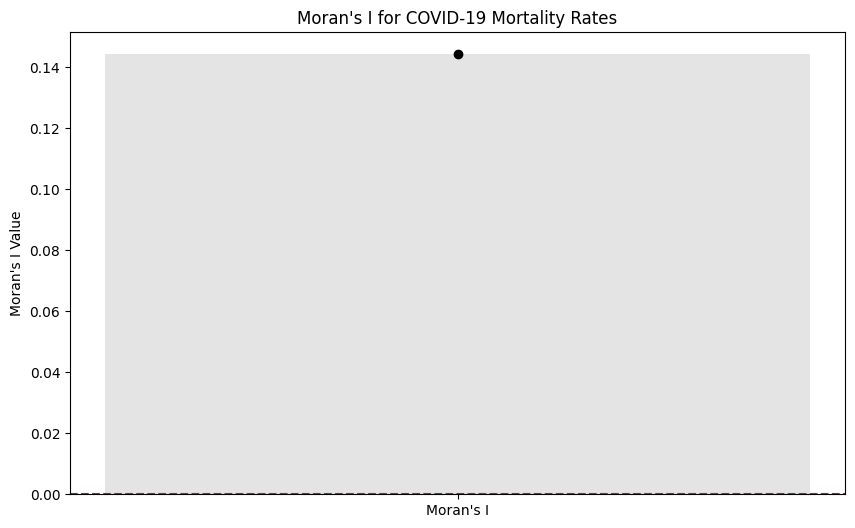

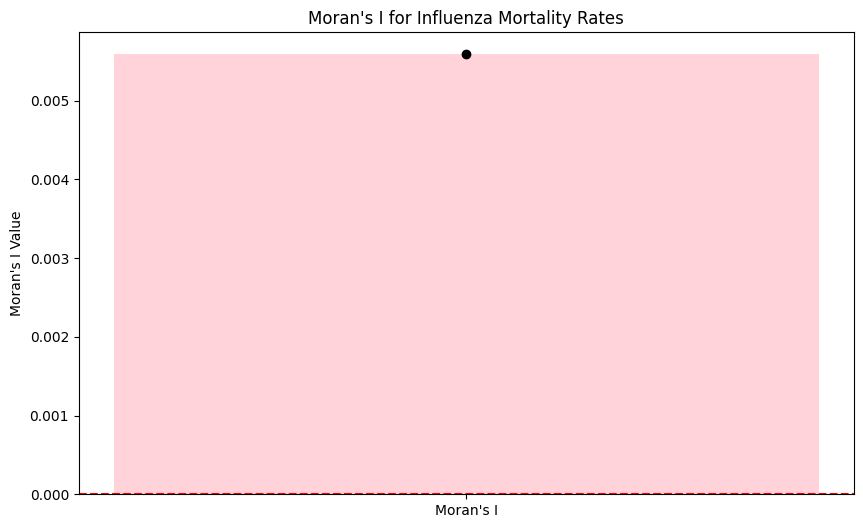

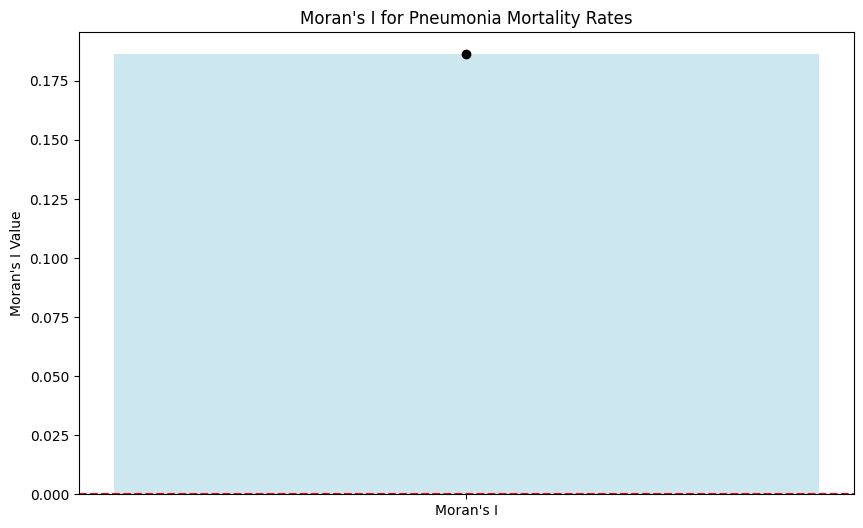

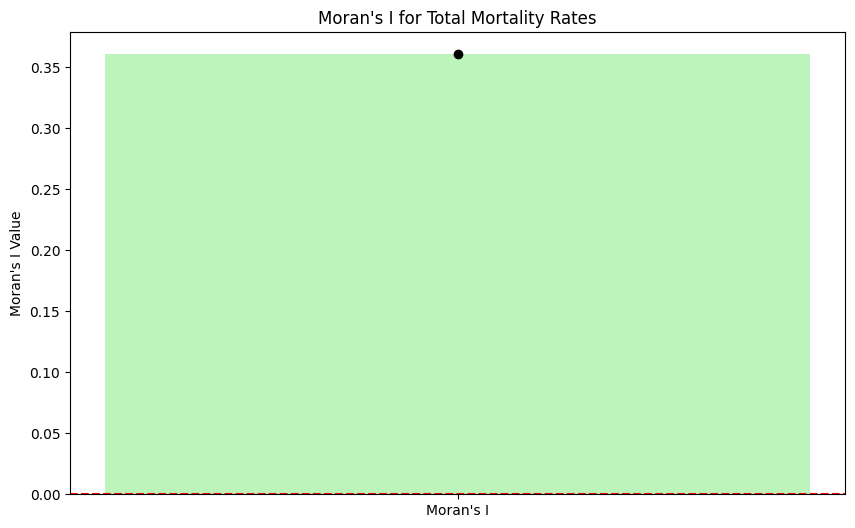

In [138]:
# Step 12: Plot Moran's I for COVID-19 mortality rates

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_covid_vals = moran_covid.I
moran_covid_pvals = moran_covid.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_covid_vals], color='lightgrey', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_covid_vals], yerr=[1.96 * np.std(moran_covid_vals)], fmt='o', color='black')

ax.set_title("Moran's I for COVID-19 Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

# Step 13: Plot Moran's I for Influenza mortality rates
fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_influenza_vals = moran_influenza.I
moran_influenza_pvals = moran_influenza.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_influenza_vals], color='lightpink', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_influenza_vals], yerr=[1.96 * np.std(moran_influenza_vals)], fmt='o', color='black')

ax.set_title("Moran's I for Influenza Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

# Step 14: Plot Moran's I for Pneumonia mortality rates
fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_pneumonia_vals = moran_pneumonia.I
moran_pneumonia_pvals = moran_pneumonia.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_pneumonia_vals], color='lightblue', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_pneumonia_vals], yerr=[1.96 * np.std(moran_pneumonia_vals)], fmt='o', color='black')

ax.set_title("Moran's I for Pneumonia Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

# Step 15: Plot Moran's I for Total mortality rates
fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_total_vals = moran_total.I
moran_total_pvals = moran_total.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_total_vals], color='lightgreen', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_total_vals], yerr=[1.96 * np.std(moran_total_vals)], fmt='o', color='black')

ax.set_title("Moran's I for Total Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()


In [139]:
#Geospatial Cluster map - Spatial outliers detection

import matplotlib.pyplot as plt
from esda.moran import Moran_Local
import numpy as np

# Step 11: Calculate Local Moran's I for COVID-19, Influenza, Pneumonia, and Total Deaths
moran_local_covid = Moran_Local(gdf_clean['COVID_19_Deaths_standardized'], w)
moran_local_influenza = Moran_Local(gdf_clean['Influenza_Deaths_standardized'], w)
moran_local_pneumonia = Moran_Local(gdf_clean['Pneumonia_Deaths_standardized'], w)
moran_local_total = Moran_Local(gdf_clean['Total_Deaths_standardized'], w)

# Step 12: Create cluster labels based on Local Moran's I results
def create_cluster_labels(moran_local):
    cluster_labels = np.zeros_like(moran_local.Is, dtype=str)
    
    # Significant clusters (p < 0.05)
    sig = moran_local.p_sim < 0.05
    
    # High-High (Hot Spots)
    high_high = sig & (moran_local.Is > 0) & (moran_local.z_sim > 0)
    cluster_labels[high_high] = "High-High"
    
    # Low-Low (Cold Spots)
    low_low = sig & (moran_local.Is > 0) & (moran_local.z_sim < 0)
    cluster_labels[low_low] = "Low-Low"
    
    # Low-High (Spatial Outliers)
    low_high = sig & (moran_local.Is < 0) & (moran_local.z_sim > 0)
    cluster_labels[low_high] = "Low-High"
    
    # High-Low (Spatial Outliers)
    high_low = sig & (moran_local.Is < 0) & (moran_local.z_sim < 0)
    cluster_labels[high_low] = "High-Low"
    
    # Non-significant areas
    cluster_labels[~sig] = "Non-significant"
    
    return cluster_labels

# Step 13: Add cluster labels to GeoDataFrame
gdf_clean['COVID_19_Cluster'] = create_cluster_labels(moran_local_covid)
gdf_clean['Influenza_Cluster'] = create_cluster_labels(moran_local_influenza)
gdf_clean['Pneumonia_Cluster'] = create_cluster_labels(moran_local_pneumonia)
gdf_clean['Total_Deaths_Cluster'] = create_cluster_labels(moran_local_total)



C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka

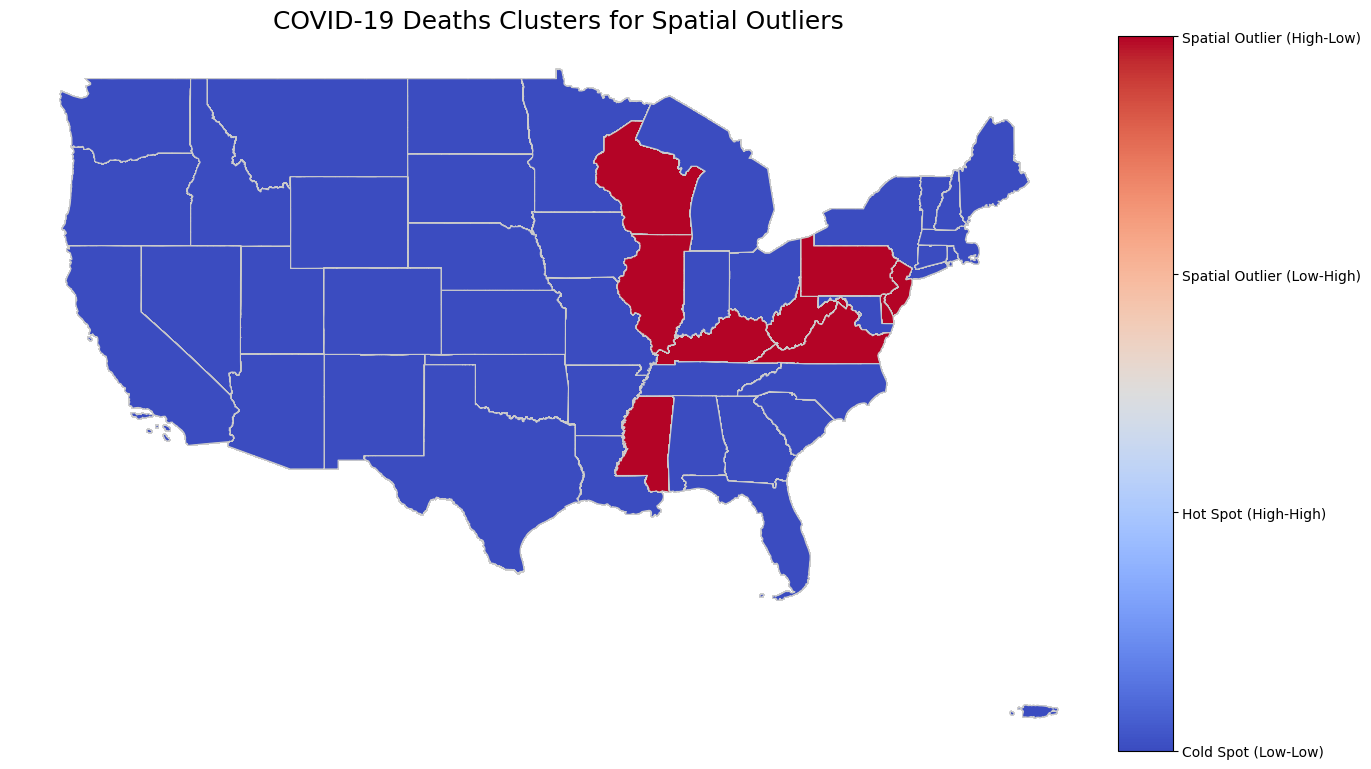

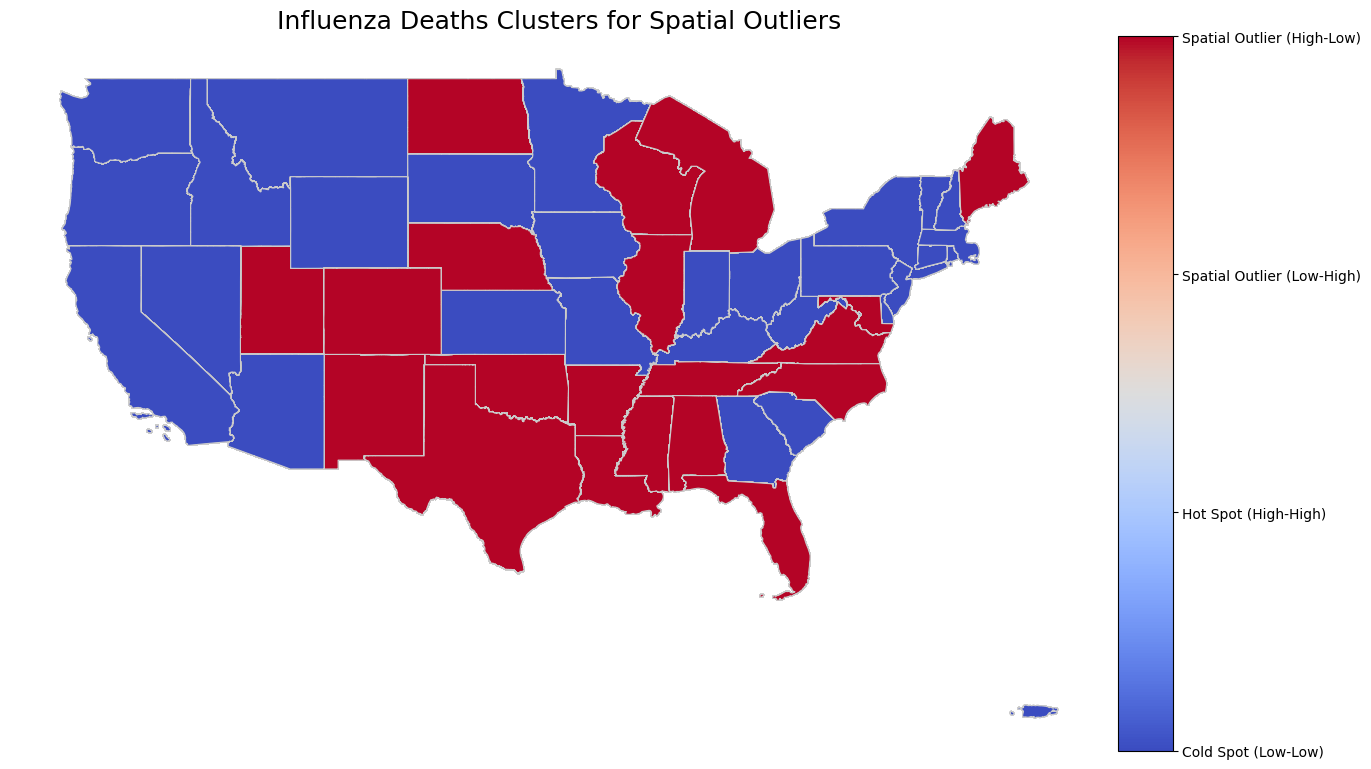

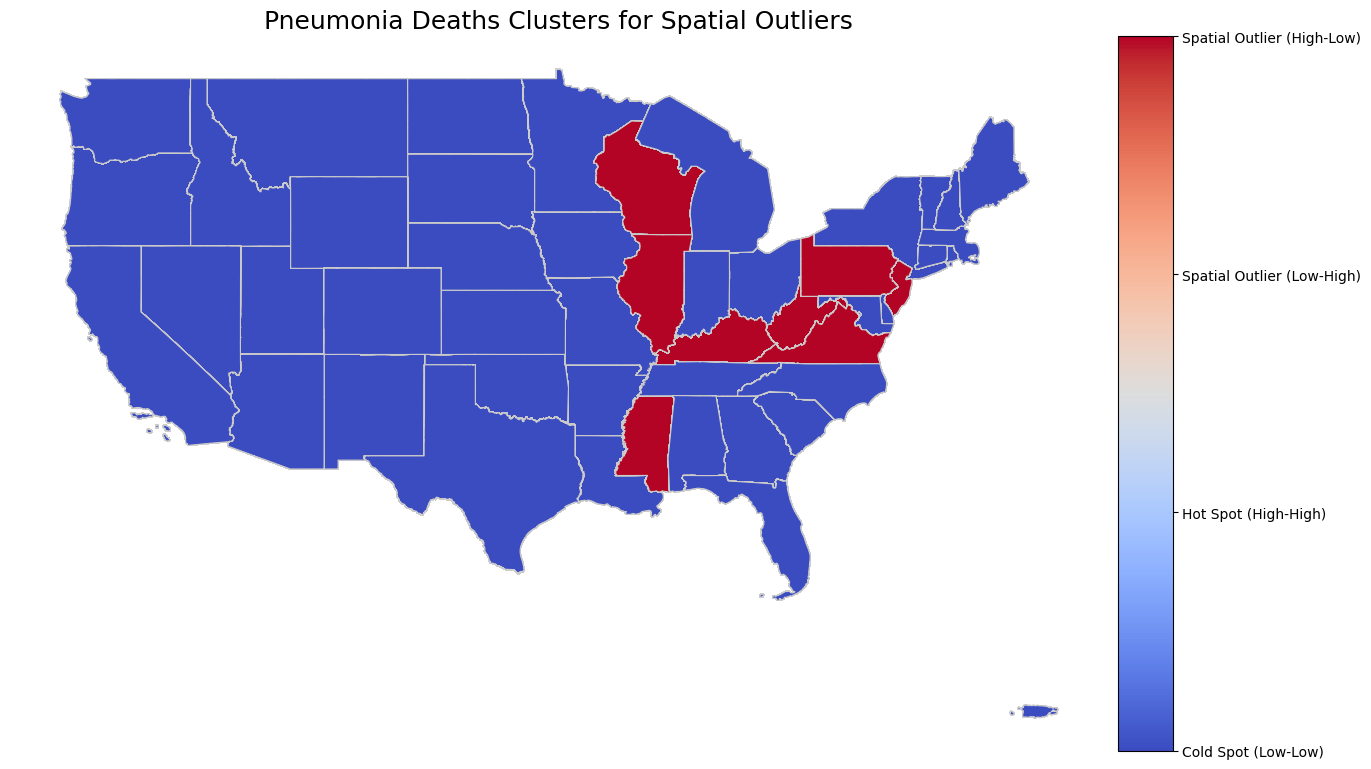

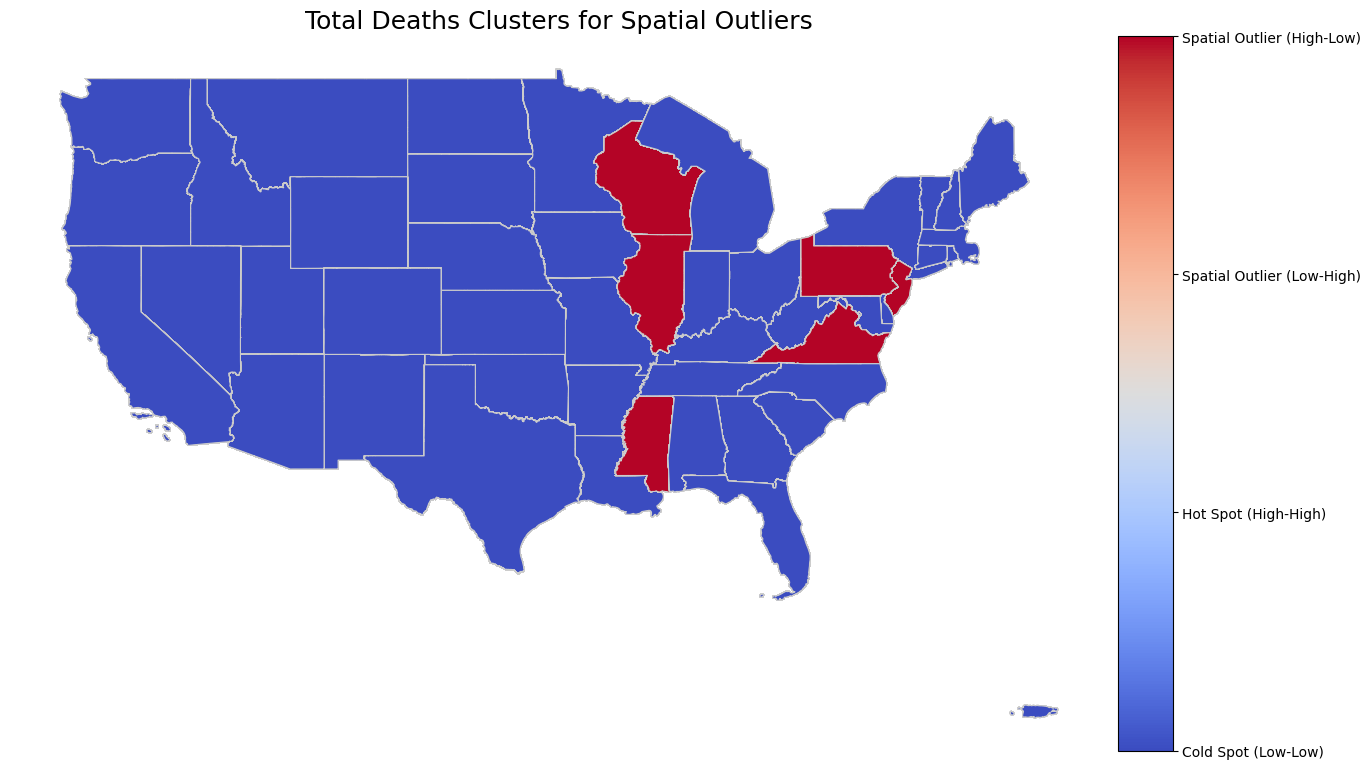

In [140]:
#step 13 - Generate cluster maps for spatial outliers

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Find unique states from the 'NAME' column
#unique_states = gdf_clean['NAME'].unique()

# Print the distinct states
#print(unique_states)

# Updated function to plot larger cluster maps with a consistent legend
def plot_cluster_map(gdf, cluster_col, title):
    fig, ax = plt.subplots(1, figsize=(15, 10))  # Increase figure size to 15x10 for larger map
    divider = make_axes_locatable(ax)

    # Plot the map with correct colors and edge settings
    gdf.plot(column=cluster_col, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
    
    # Create a colorbar inside the map
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=1, vmax=4))  # Assuming 4 clusters
    sm.set_array([])  # Set array for colorbar to recognize
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_ticks([1, 2, 3, 4])  # Set ticks for your cluster types
    cbar.set_ticklabels(['Cold Spot (Low-Low)', 'Hot Spot (High-High)', 'Spatial Outlier (Low-High)', 'Spatial Outlier (High-Low)'])  # Custom tick labels

    # Manually add labels to the map (Hot Spot, Cold Spot, etc.)
    cluster_labels = {
        1: "Hot Spot (High-High)",
        2: "Cold Spot (Low-Low)",
        3: "Spatial Outlier (Low-High)",
        4: "Spatial Outlier (High-Low)",
        0: "Non-significant"  # Assuming 0 corresponds to non-significant
    }
    
    # Update legend labels on the map directly
    for idx, row in gdf.iterrows():
        if row[cluster_col] in cluster_labels:
            label = cluster_labels[row[cluster_col]]
            ax.annotate(label, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                        horizontalalignment='center', fontsize=8, color='black')
    
    ax.set_title(title, fontsize=18)  # Set a bigger title font size
    ax.set_axis_off()  # Remove the axis for a cleaner map look
    plt.show()

# Generate larger maps with updated legends
plot_cluster_map(gdf_clean, 'COVID_19_Cluster', "COVID-19 Deaths Clusters for Spatial Outliers")
plot_cluster_map(gdf_clean, 'Influenza_Cluster', "Influenza Deaths Clusters for Spatial Outliers")
plot_cluster_map(gdf_clean, 'Pneumonia_Cluster', "Pneumonia Deaths Clusters for Spatial Outliers")
plot_cluster_map(gdf_clean, 'Total_Deaths_Cluster', "Total Deaths Clusters for Spatial Outliers")


In [81]:
# Sort the gdf_clean dataframe by COVID_19_Deaths in descending order
print(gdf_clean)
gdf_sorted = gdf_clean[['NAME', 'COVID_19_Deaths']].sort_values(by='COVID_19_Deaths', ascending=False)

# Display the result
print(gdf_sorted)

       OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME  \
338           2      3        7      05  00068085    05     AR    Arkansas   
344           2      3        7      05  00068085    05     AR    Arkansas   
350           2      3        7      05  00068085    05     AR    Arkansas   
363           2      3        7      05  00068085    05     AR    Arkansas   
383           2      3        7      05  00068085    05     AR    Arkansas   
...         ...    ...      ...     ...       ...   ...    ...         ...   
13967        56      4        9      06  01779778    06     CA  California   
13968        56      4        9      06  01779778    06     CA  California   
13997        56      4        9      06  01779778    06     CA  California   
13998        56      4        9      06  01779778    06     CA  California   
14004        56      4        9      06  01779778    06     CA  California   

      LSAD  MTFCC  ... Pneumonia_Influenza_or_COVID_19_Deaths  

                    NAME  COVID_19_Deaths Deaths_Binned
42                 Texas          10311.0         2500+
3             California           8407.0         2500+
8                Florida           6253.0         2500+
9                Georgia           2848.0         2500+
33                  Ohio           2311.0     2001-2500
1                Arizona           2233.0     2001-2500
31        North Carolina           1863.0     1501-2000
41             Tennessee           1807.0     1501-2000
11              Illinois           1805.0     1501-2000
36          Pennsylvania           1793.0     1501-2000
20              Michigan           1711.0     1501-2000
28            New Jersey           1198.0     1001-1500
30              New York           1172.0     1001-1500
0                Alabama           1059.0     1001-1500
34              Oklahoma            984.0      501-1000
39        South Carolina            953.0      501-1000
16             Louisiana            932.0      5

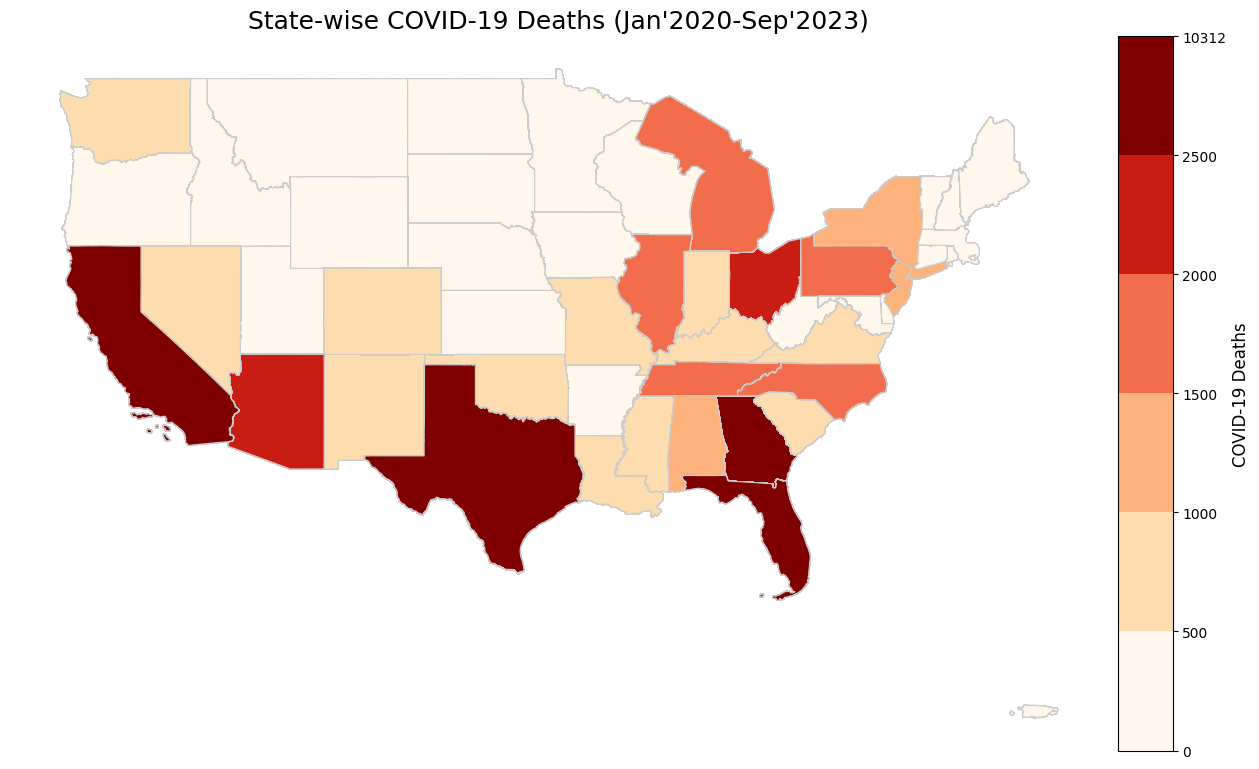

In [26]:
#Below map is for overall Covid-19 mortality for the period, Jan-2020 till Sep-2023

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the COVID-19 deaths per state
state_deaths = gdf_clean.groupby('NAME')['COVID_19_Deaths'].sum().reset_index()

# Step 2: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['COVID_19_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['COVID_19_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'COVID_19_Deaths', 'Deaths_Binned']].sort_values(by='COVID_19_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.OrRd  # Using 'OrRd' (Orange-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('COVID-19 Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['COVID_19_Deaths']) and row['COVID_19_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['COVID_19_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise COVID-19 Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()


State-wise Influenza Deaths (Sum):
                    NAME  Influenza_Deaths
0                Alabama               0.0
1                Arizona               0.0
2               Arkansas               0.0
3             California              84.0
4               Colorado               0.0
5            Connecticut               0.0
6               Delaware               0.0
7   District of Columbia               0.0
8                Florida               0.0
9                Georgia               0.0
10                 Idaho               0.0
11              Illinois               0.0
12               Indiana               0.0
13                  Iowa               0.0
14                Kansas               0.0
15              Kentucky               0.0
16             Louisiana               0.0
17                 Maine               0.0
18              Maryland               0.0
19         Massachusetts               0.0
20              Michigan               0.0
21             Minn

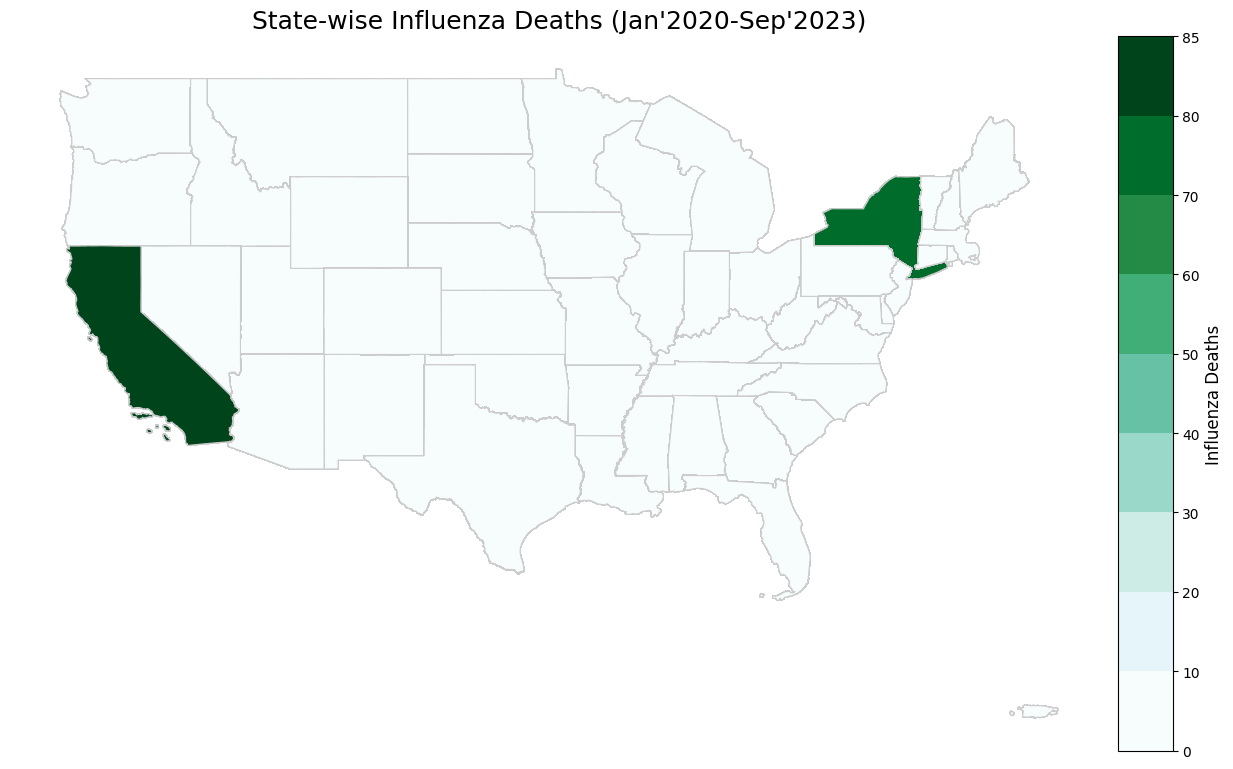

In [141]:
#Below map is for overall Influenza mortality for the period, Jan-2020 till Sep-2023
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the Influenza deaths per state
state_deaths = gdf_clean.groupby('NAME')['Influenza_Deaths'].sum().reset_index()

# Debugging: Check the summed deaths
print("State-wise Influenza Deaths (Sum):")
print(state_deaths)

# Step 2: Define custom bins and labels
max_value = state_deaths['Influenza_Deaths'].max()  # Get the max value from state_deaths
print(f"Maximum value of Influenza Deaths: {max_value}")  # Debug print

# Define the bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, max_value + 1]  # Create bins including max value

# Check for monotonicity
print("Bins before sorting:", bins)
if len(set(bins)) != len(bins):
    print("Warning: Bins contain duplicates!")

# Sort bins to ensure they are monotonically increasing
bins = sorted(set(bins))  # Use set to eliminate duplicates, then sort

# Confirm the final bins
print("Bins after sorting:", bins)

# Define bin labels accordingly
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60','61-70','71-80', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Influenza_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'Influenza_Deaths', 'Deaths_Binned']].sort_values(by='Influenza_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.BuGn  # Using 'BuGn' (Blue-Green) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Influenza Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['Influenza_Deaths']) and row['Influenza_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['Influenza_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise Influenza Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()


State-wise Pneumonia Deaths (Sum):
                    NAME  Pneumonia_Deaths
0                Alabama             541.0
1                Arizona            1624.0
2               Arkansas             312.0
3             California            7077.0
4               Colorado             431.0
5            Connecticut               0.0
6               Delaware               0.0
7   District of Columbia               0.0
8                Florida            5290.0
9                Georgia            1925.0
10                 Idaho              40.0
11              Illinois            1245.0
12               Indiana             755.0
13                  Iowa              22.0
14                Kansas             118.0
15              Kentucky             566.0
16             Louisiana             574.0
17                 Maine               0.0
18              Maryland             219.0
19         Massachusetts              73.0
20              Michigan            1251.0
21             Minn

KeyError: 'Deaths_Binned'

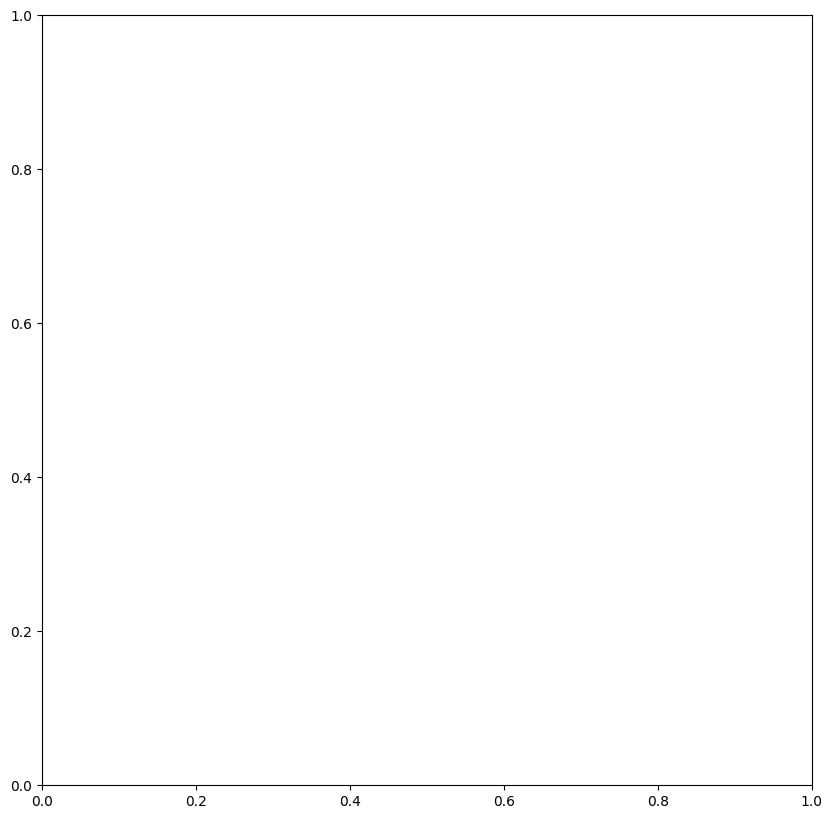

In [142]:
#Below map is for overall Pneumonia mortality for the period, Jan-2020 till Sep-2023
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the Pneumonia deaths per state
state_deaths = gdf_clean.groupby('NAME')['Pneumonia_Deaths'].sum().reset_index()

# Debugging: Check the summed deaths
print("State-wise Pneumonia Deaths (Sum):")
print(state_deaths)

# Step 2: Define custom bins and labels
max_value = state_deaths['Pneumonia_Deaths'].max()  # Get the max value from state_deaths
print(f"Maximum value of Pneumonia Deaths: {max_value}")  # Debug print

# Define the bins
bins = [0, 500, 1000, 1500, 2000, 2500, max_value + 1]  # Create bins including max value

# Check for monotonicity
print("Bins before sorting:", bins)
if len(set(bins)) != len(bins):
    print("Warning: Bins contain duplicates!")

# Sort bins to ensure they are monotonically increasing
bins = sorted(set(bins))  # Use set to eliminate duplicates, then sort

# Confirm the final bins
print("Bins after sorting:", bins)

# Define bin labels accordingly
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Pneumonia_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'Pneumonia_Deaths', 'Deaths_Binned']].sort_values(by='Pneumonia_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.BuPu  # Using 'BuPu' (Blue-Purple) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Pneumonia Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['Pneumonia_Deaths']) and row['Pneumonia_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['Pneumonia_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise Pneumonia Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()

State-wise Total Deaths (Sum):
                    NAME  Total_Deaths
0                Alabama        4344.0
1                Arizona       11107.0
2               Arkansas        2521.0
3             California       68395.0
4               Colorado        3575.0
5            Connecticut        1778.0
6               Delaware        1322.0
7   District of Columbia         940.0
8                Florida       42493.0
9                Georgia       16385.0
10                 Idaho        1964.0
11              Illinois       13122.0
12               Indiana        5776.0
13                  Iowa        1398.0
14                Kansas        2039.0
15              Kentucky        4302.0
16             Louisiana        4933.0
17                 Maine        1719.0
18              Maryland        2274.0
19         Massachusetts        1444.0
20              Michigan       10661.0
21             Minnesota        1433.0
22           Mississippi        2201.0
23              Missouri        4

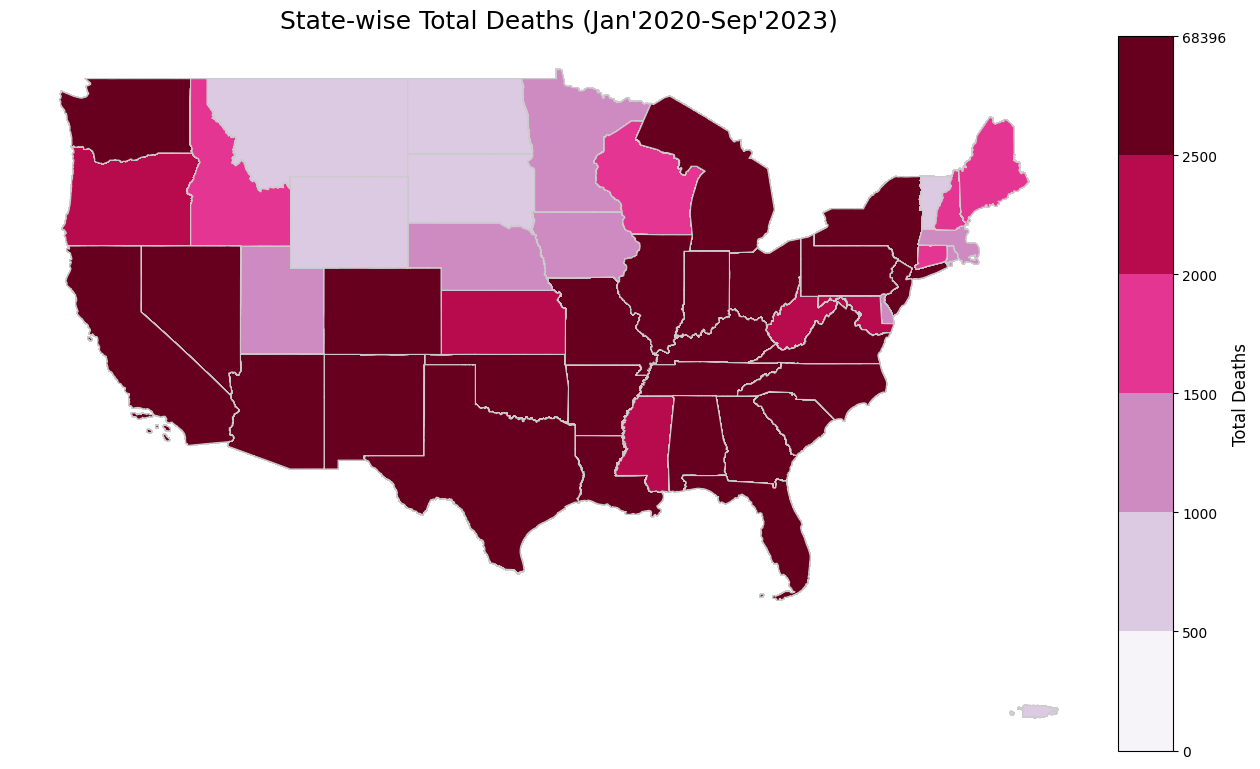

In [82]:
#Below map is for overall Total mortality for the period, Jan-2020 till Sep-2023
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the Total deaths per state
state_deaths = gdf_clean.groupby('NAME')['Total_Deaths'].sum().reset_index()

# Debugging: Check the summed deaths
print("State-wise Total Deaths (Sum):")
print(state_deaths)

# Step 2: Define custom bins and labels
max_value = state_deaths['Total_Deaths'].max()  # Get the max value from state_deaths
print(f"Maximum value of Total Deaths: {max_value}")  # Debug print

# Define the bins
bins = [0, 500, 1000, 1500, 2000, 2500, max_value + 1]  # Create bins including max value

# Check for monotonicity
print("Bins before sorting:", bins)
if len(set(bins)) != len(bins):
    print("Warning: Bins contain duplicates!")

# Sort bins to ensure they are monotonically increasing
bins = sorted(set(bins))  # Use set to eliminate duplicates, then sort

# Confirm the final bins
print("Bins after sorting:", bins)

# Define bin labels accordingly
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Total_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'Total_Deaths', 'Deaths_Binned']].sort_values(by='Total_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.PuRd  # Using 'PuRd' (Purple-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Total Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['Total_Deaths']) and row['Total_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['Total_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise Total Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()

In [223]:
# Find unique states from the 'NAME' column
#unique_states = gdf_clean['NAME'].unique()

# Print the distinct states
#print(unique_states)

['Arkansas' 'New Mexico' 'Montana' 'New York' 'North Dakota'
 'South Dakota' 'Utah' 'Oregon' 'Washington' 'Idaho' 'Puerto Rico'
 'Oklahoma' 'New Jersey' 'Rhode Island' 'Louisiana' 'Connecticut'
 'West Virginia' 'Ohio' 'Kentucky' 'Georgia' 'Mississippi' 'Massachusetts'
 'Delaware' 'Vermont' 'Pennsylvania' 'Maryland' 'Tennessee' 'Alabama'
 'Virginia' 'Missouri' 'New Hampshire' 'Maine' 'South Carolina' 'Iowa'
 'North Carolina' 'Kansas' 'Nebraska' 'Wyoming' 'Colorado' 'Minnesota'
 'Wisconsin' 'Michigan' 'Indiana' 'Texas' 'Florida' 'District of Columbia'
 'Illinois' 'Arizona' 'Nevada' 'California']


In [222]:
# Find unique Age_Group from the 'NAME' column
unique_AgeGroup= gdf_clean['Age_Group'].unique()

# Print the distinct states
print(unique_AgeGroup)
#print(gdf_clean)

['40-49 years' '30-39 years' '35-44 years']
      OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME  \
0            2      3        7      05  00068085    05     AR    Arkansas   
1            2      3        7      05  00068085    05     AR    Arkansas   
2            2      3        7      05  00068085    05     AR    Arkansas   
3            2      3        7      05  00068085    05     AR    Arkansas   
4            2      3        7      05  00068085    05     AR    Arkansas   
...        ...    ...      ...     ...       ...   ...    ...         ...   
2781        56      4        9      06  01779778    06     CA  California   
2782        56      4        9      06  01779778    06     CA  California   
2783        56      4        9      06  01779778    06     CA  California   
2784        56      4        9      06  01779778    06     CA  California   
2785        56      4        9      06  01779778    06     CA  California   

     LSAD  MTFCC  ... Influenza

Year: 2020.0
                     NAME  COVID_19_Deaths Deaths_Binned
166                 Texas           2485.0     2001-2500
12             California           2371.0     2001-2500
32                Florida            954.0      501-1000
43               Illinois            636.0      501-1000
4                 Arizona            588.0      501-1000
111            New Jersey            551.0      501-1000
35                Georgia            492.0         0-500
119              New York            413.0         0-500
79               Michigan            281.0         0-500
143          Pennsylvania            256.0         0-500
131                  Ohio            236.0         0-500
162             Tennessee            206.0         0-500
123        North Carolina            198.0         0-500
115            New Mexico            151.0         0-500
103                Nevada            144.0         0-500
71               Maryland            141.0         0-500
63              Lo

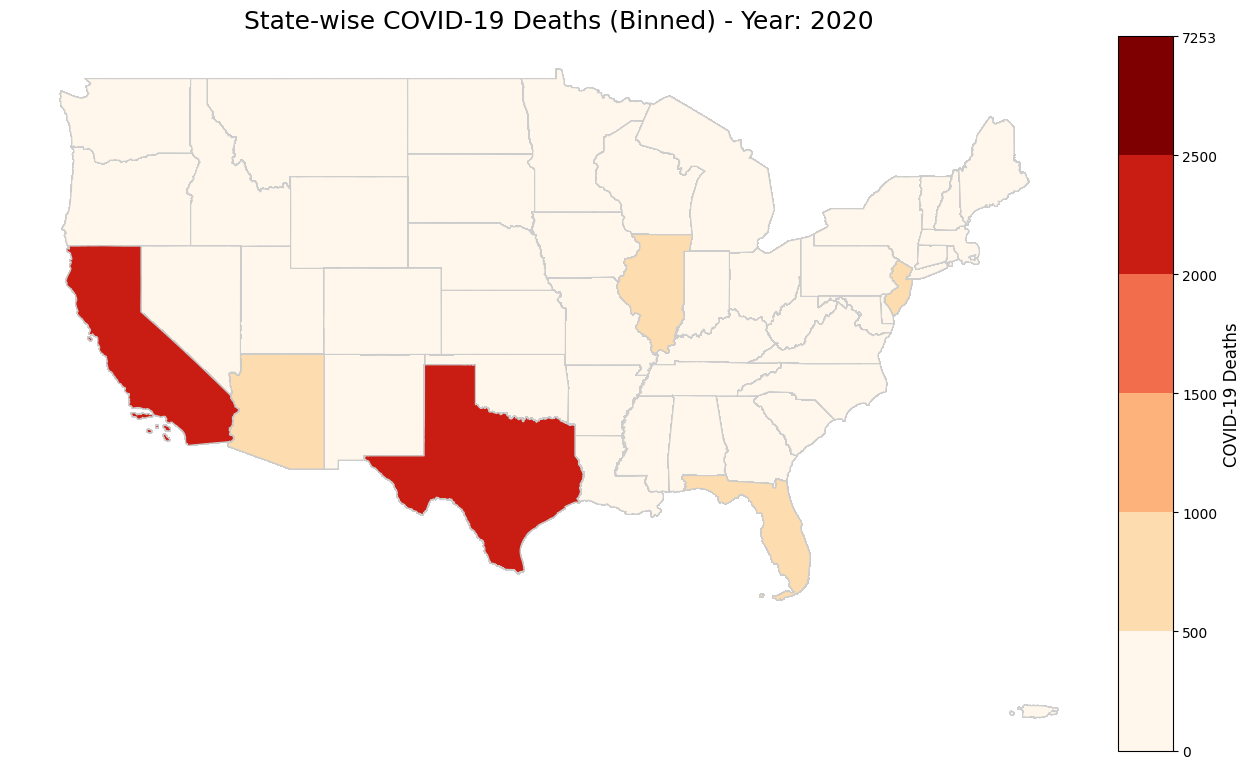

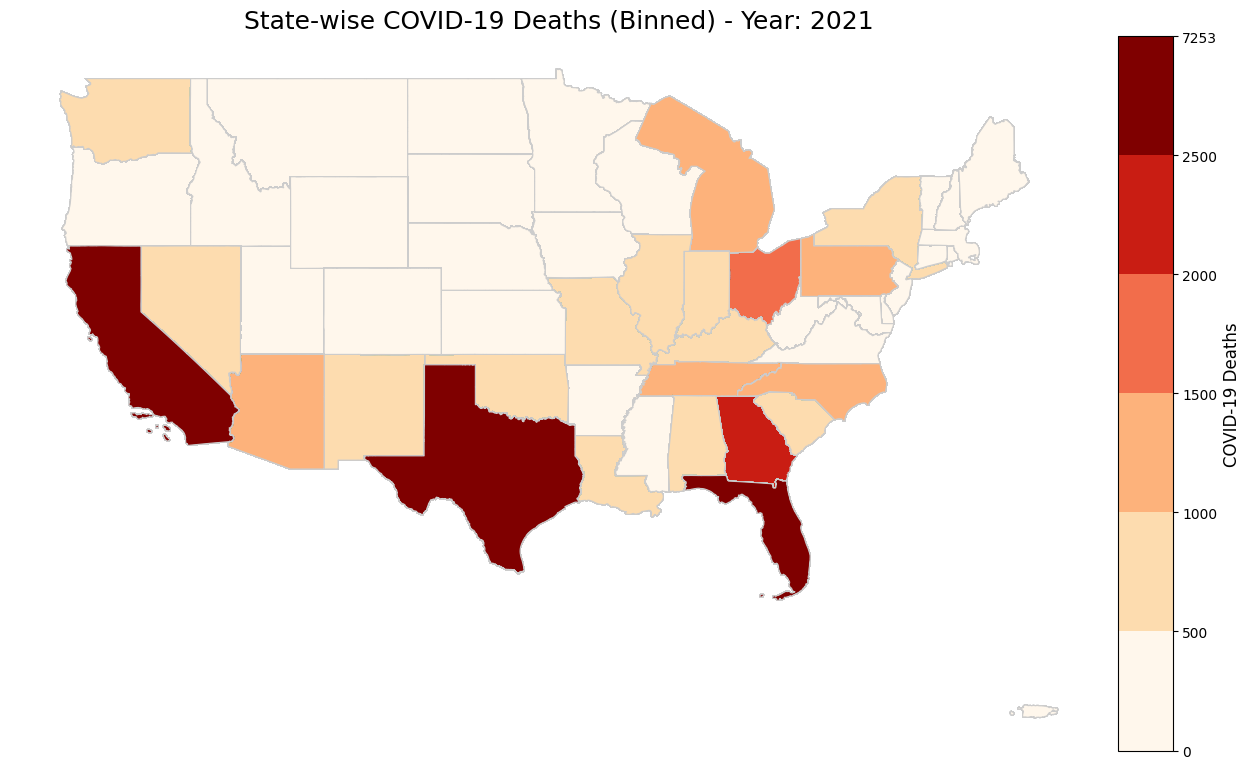

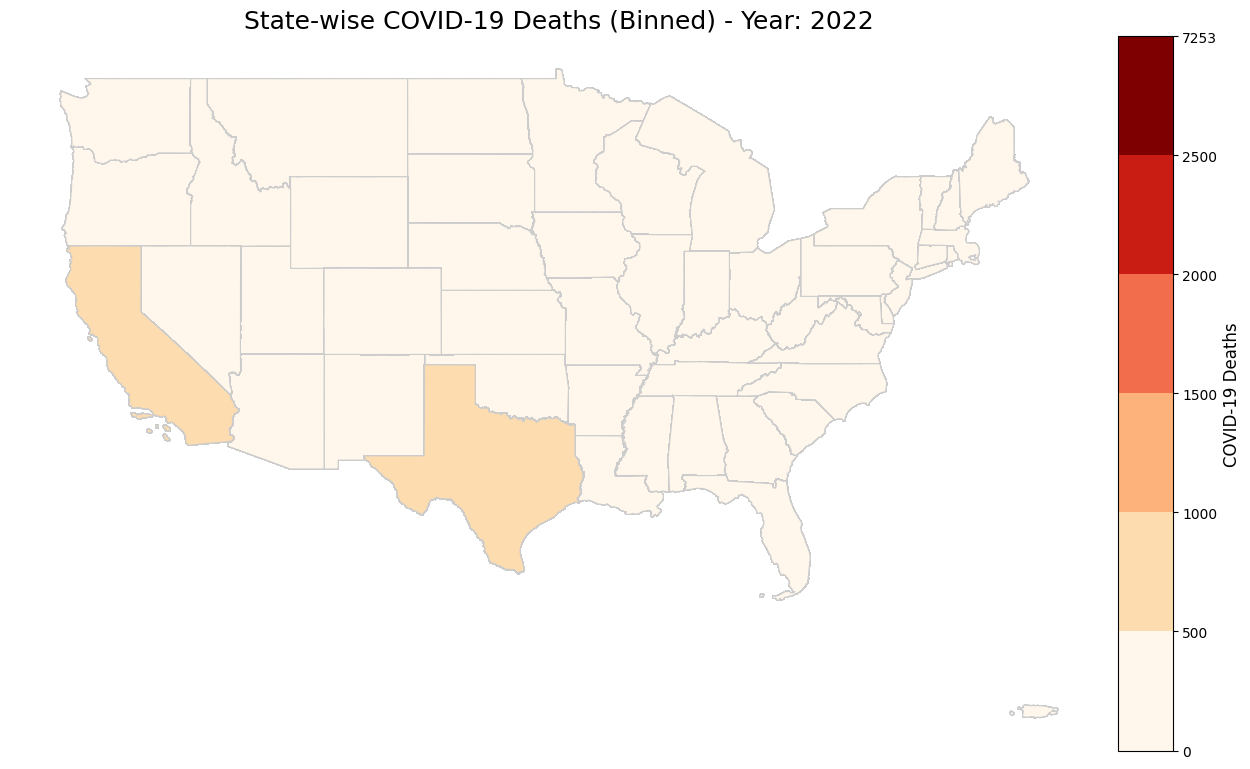

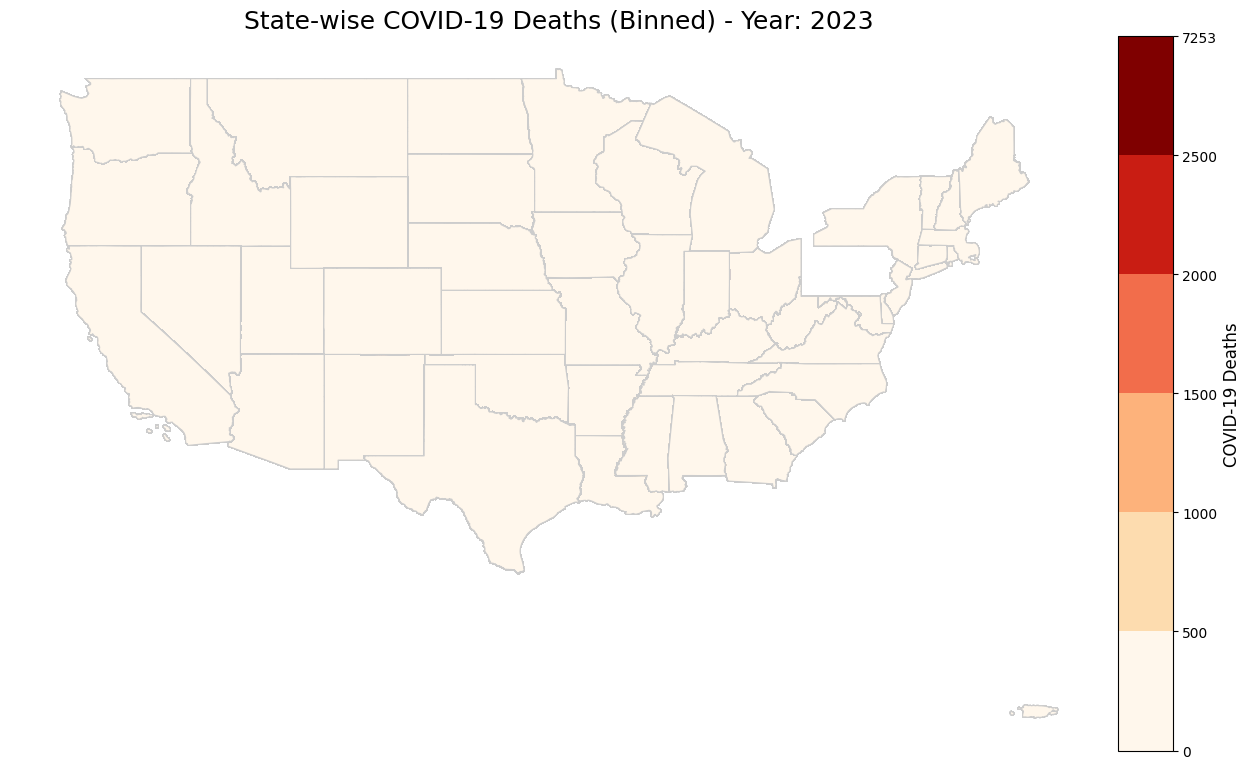

In [84]:
#Year-wise COVID-19 mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the COVID-19 deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['COVID_19_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['COVID_19_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['COVID_19_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'COVID_19_Deaths', 'Deaths_Binned']].sort_values(by='COVID_19_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.OrRd  # Using 'OrRd' (Orange-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('COVID-19 Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['COVID_19_Deaths']) and row['COVID_19_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['COVID_19_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    #ax.set_title(f"State-wise COVID-19 Deaths (Binned) - Year: {year}", fontsize=18)
    ax.set_title(f"State-wise COVID-19 Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()


Year: 2020.0
                     NAME  Influenza_Deaths Deaths_Binned
12             California              84.0           80+
119              New York              71.0         71-80
166                 Texas              10.0          0-10
8                Arkansas               0.0          0-10
4                 Arizona               0.0          0-10
20            Connecticut               0.0          0-10
24               Delaware               0.0          0-10
28   District of Columbia               0.0          0-10
16               Colorado               0.0          0-10
35                Georgia               0.0          0-10
39                  Idaho               0.0          0-10
43               Illinois               0.0          0-10
47                Indiana               0.0          0-10
51                   Iowa               0.0          0-10
55                 Kansas               0.0          0-10
59               Kentucky               0.0          0-10
3

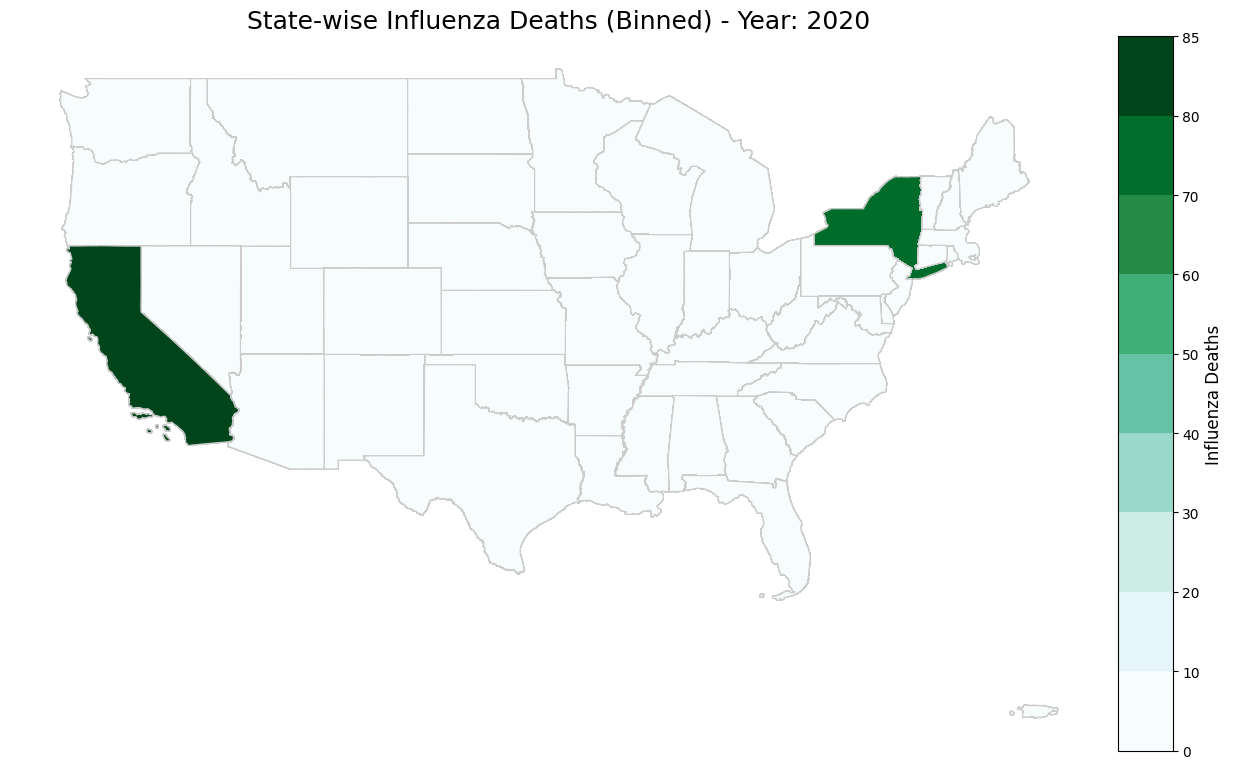

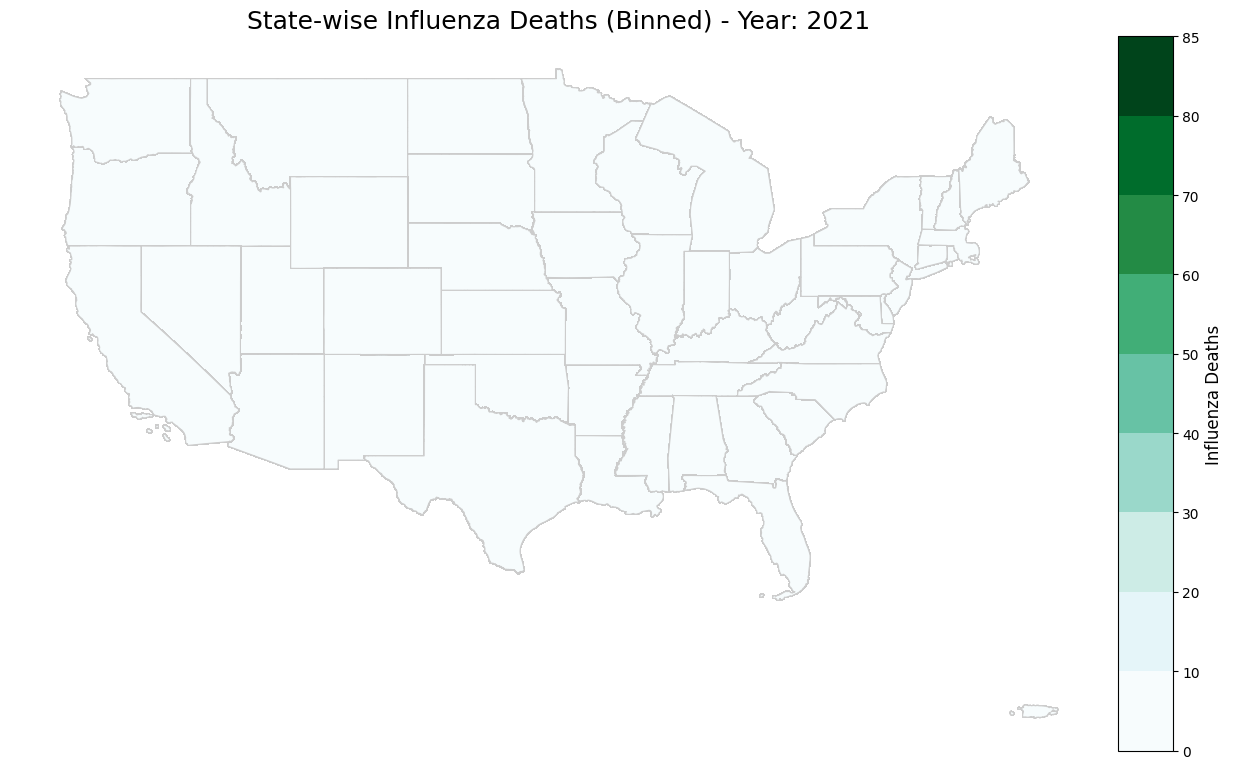

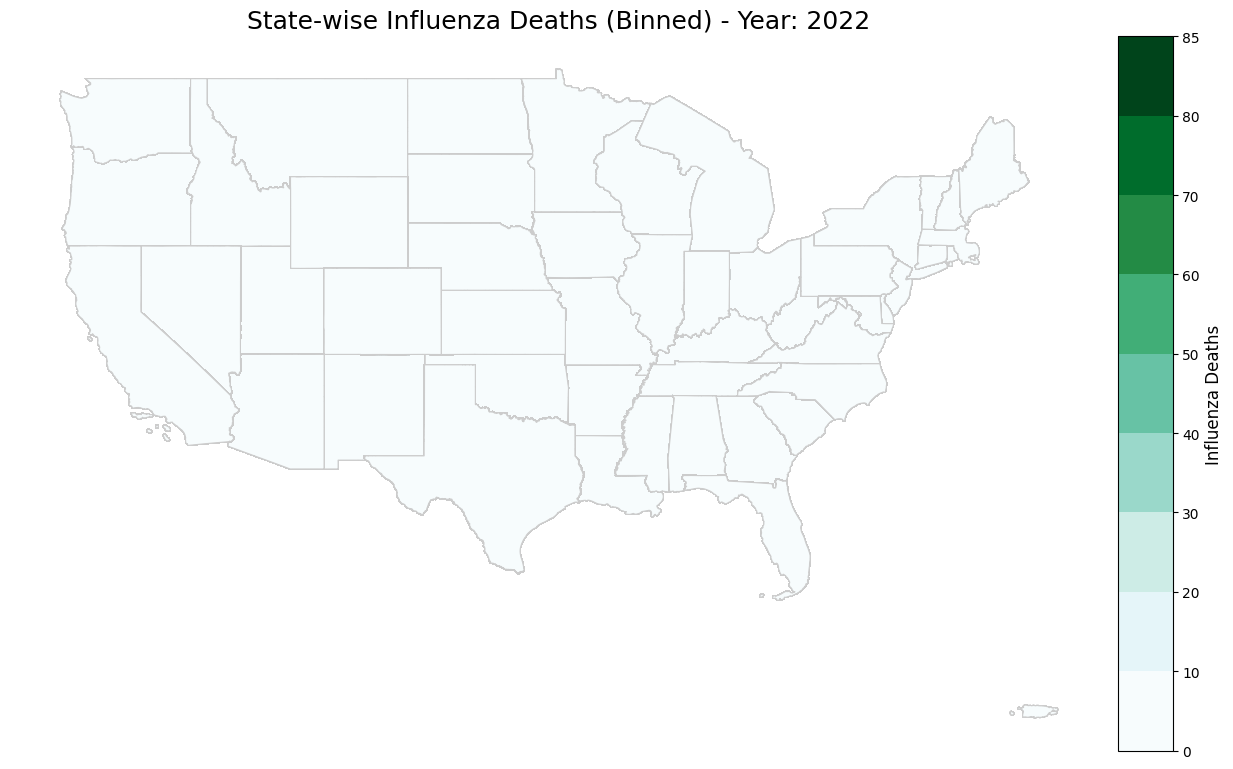

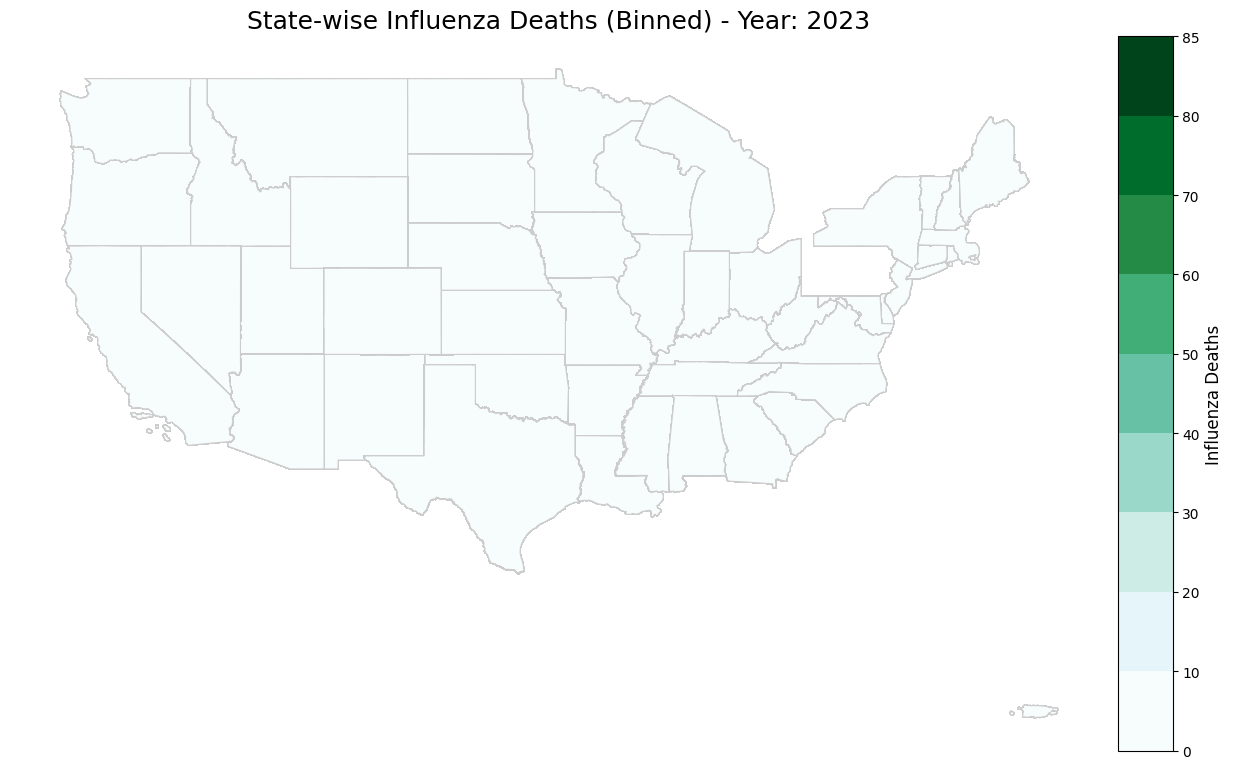

In [143]:
#Year-wise Influenza mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the Influenza deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['Influenza_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, state_deaths['Influenza_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Influenza_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'Influenza_Deaths', 'Deaths_Binned']].sort_values(by='Influenza_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.BuGn  # Using 'BuGn' (Blue-Green) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Influenza Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['Influenza_Deaths']) and row['Influenza_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['Influenza_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    ax.set_title(f"State-wise Influenza Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()


Year: 2020.0
                     NAME  Pneumonia_Deaths Deaths_Binned
12             California            2164.0     2001-2500
166                 Texas            1804.0     1501-2000
32                Florida             846.0      501-1000
4                 Arizona             405.0         0-500
35                Georgia             378.0         0-500
43               Illinois             376.0         0-500
111            New Jersey             340.0         0-500
119              New York             274.0         0-500
79               Michigan             212.0         0-500
131                  Ohio             184.0         0-500
143          Pennsylvania             178.0         0-500
162             Tennessee             166.0         0-500
123        North Carolina             156.0         0-500
103                Nevada             128.0         0-500
115            New Mexico             120.0         0-500
47                Indiana             119.0         0-500
6

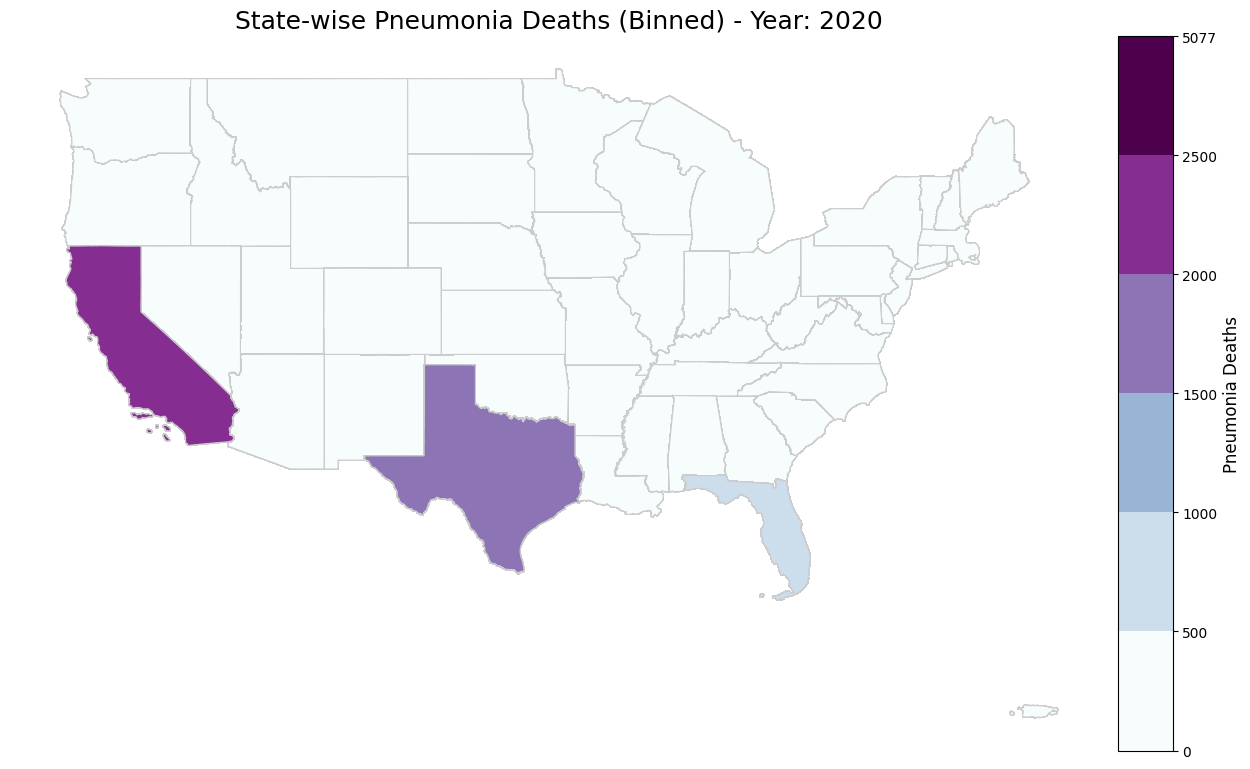

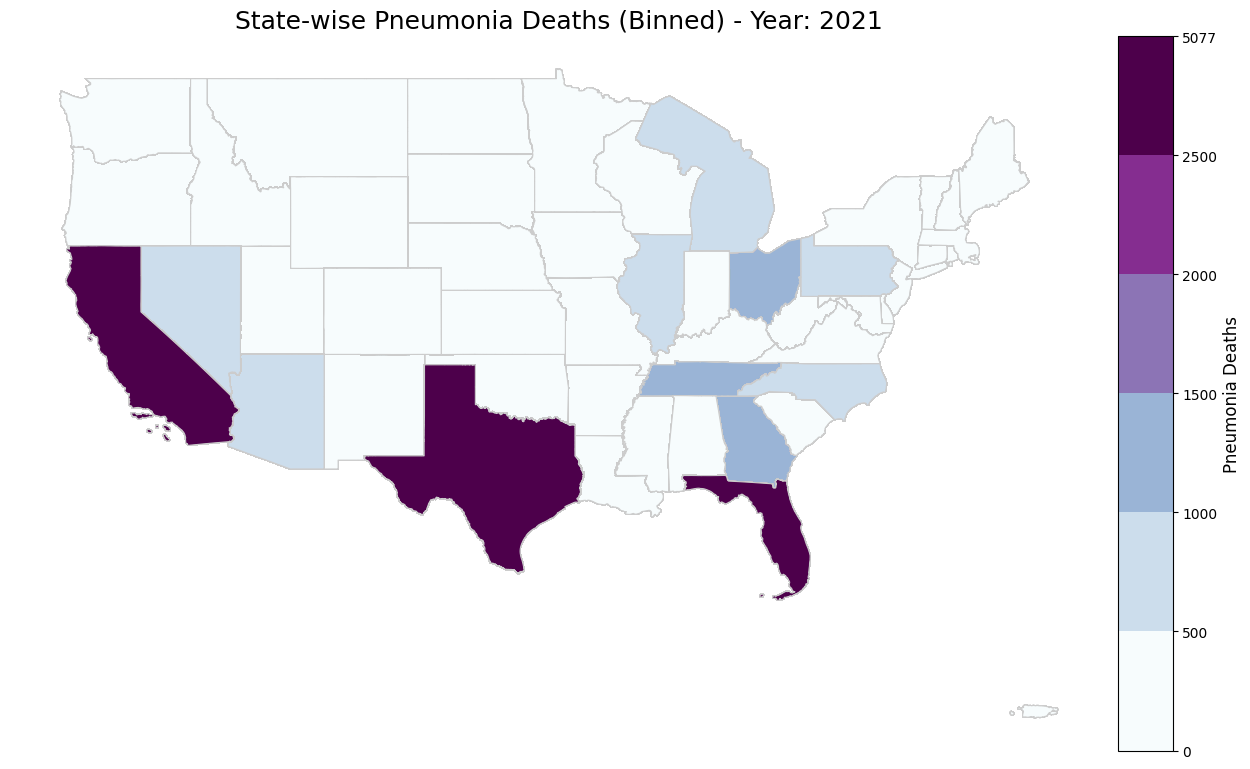

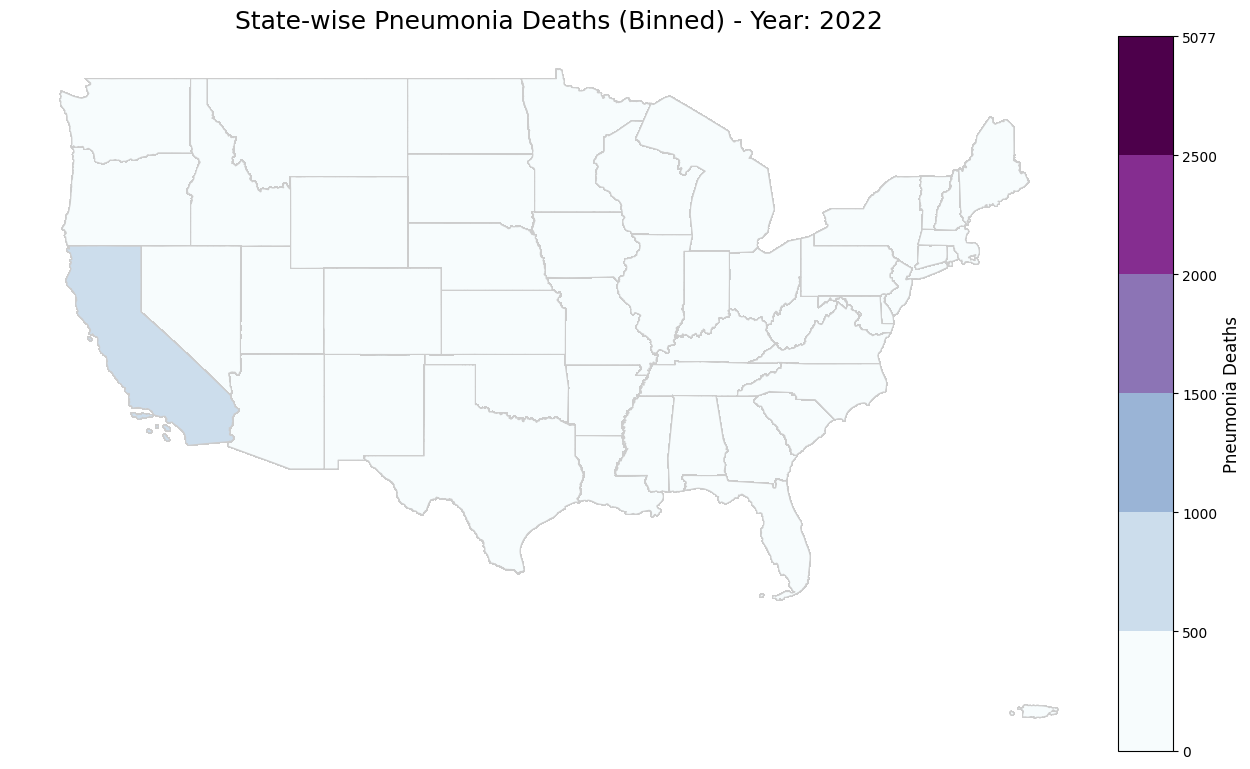

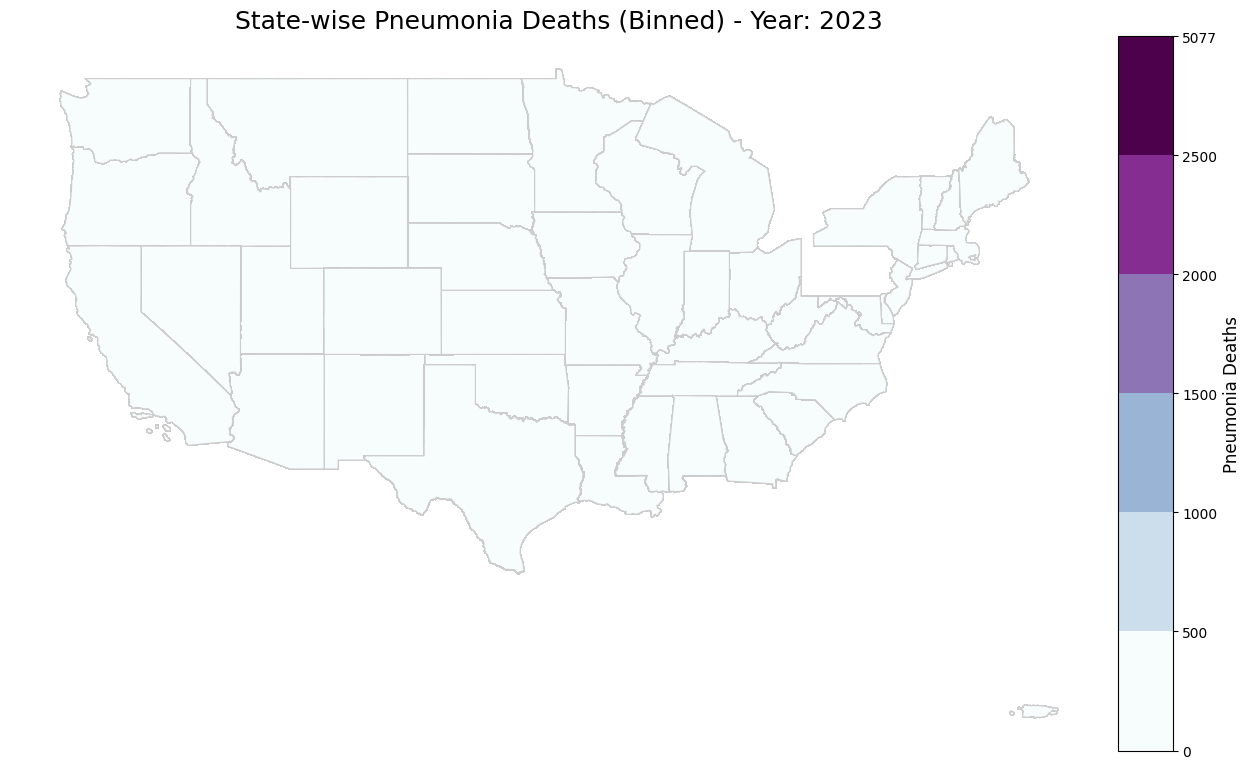

In [86]:
#Year-wise Pneumonia mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the Pneumonia deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['Pneumonia_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['Pneumonia_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Pneumonia_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'Pneumonia_Deaths', 'Deaths_Binned']].sort_values(by='Pneumonia_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.BuPu  # Using 'BuPu' (Blue-Purple) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Pneumonia Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['Pneumonia_Deaths']) and row['Pneumonia_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['Pneumonia_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    ax.set_title(f"State-wise Pneumonia Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()


Year: 2020.0
                     NAME  Total_Deaths Deaths_Binned
12             California       24805.0         2500+
166                 Texas       17069.0         2500+
32                Florida       11529.0         2500+
35                Georgia        4666.0         2500+
43               Illinois        4313.0         2500+
4                 Arizona        3482.0         2500+
131                  Ohio        2855.0         2500+
143          Pennsylvania        2826.0         2500+
123        North Carolina        2521.0         2500+
79               Michigan        2445.0     2001-2500
162             Tennessee        2309.0     2001-2500
119              New York        2231.0     2001-2500
111            New Jersey        1998.0     1501-2000
63              Louisiana        1242.0     1001-1500
47                Indiana        1139.0     1001-1500
71               Maryland         832.0      501-1000
103                Nevada         821.0      501-1000
0              

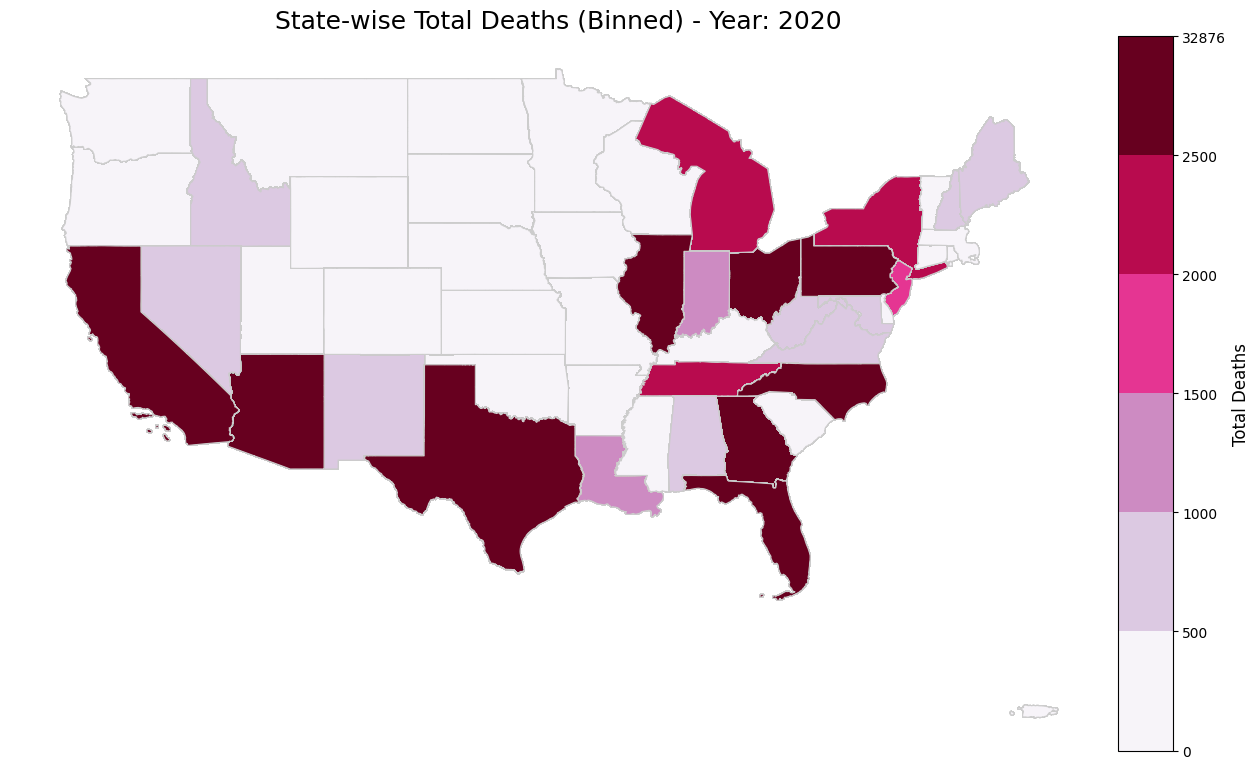

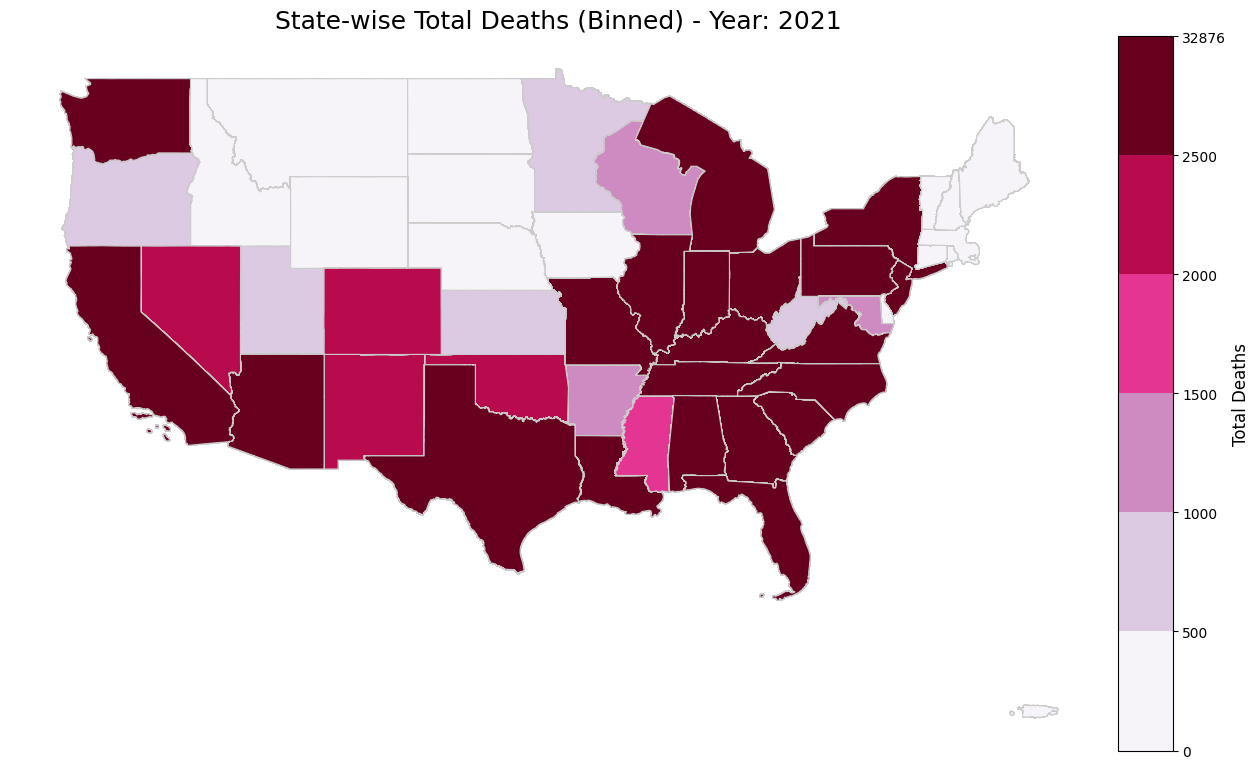

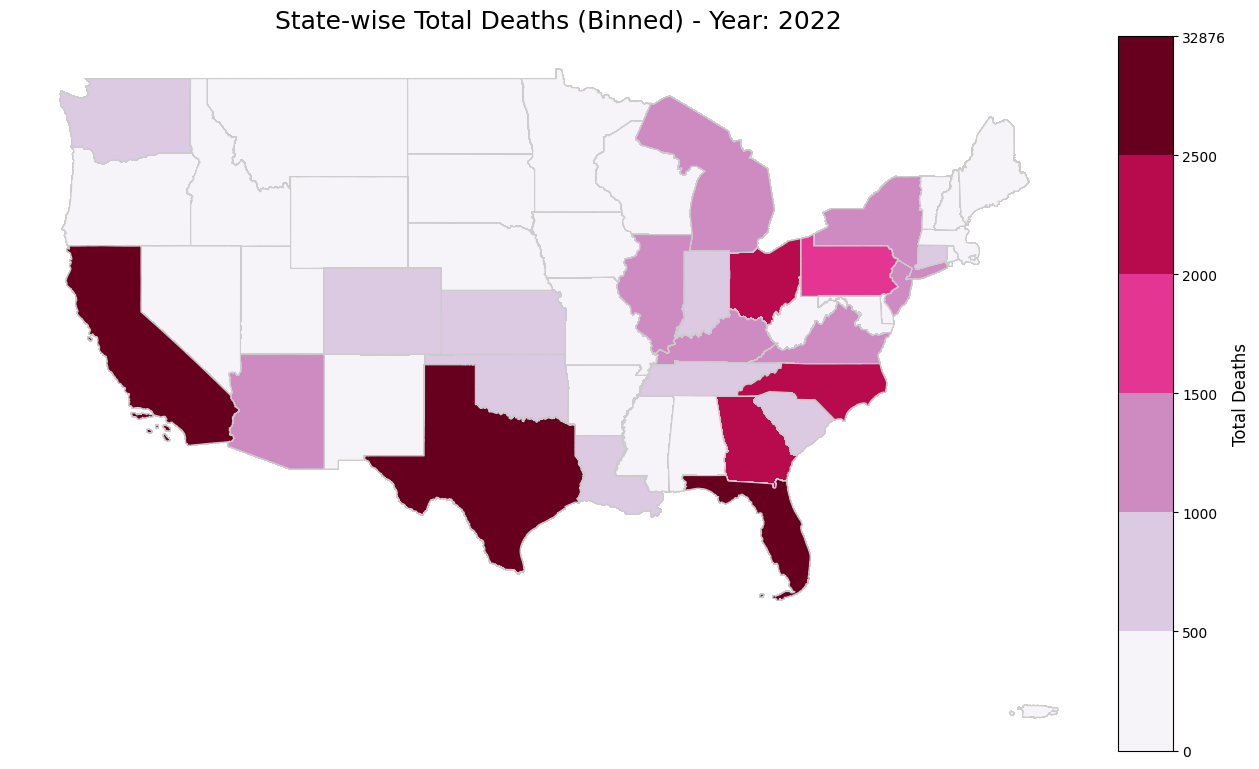

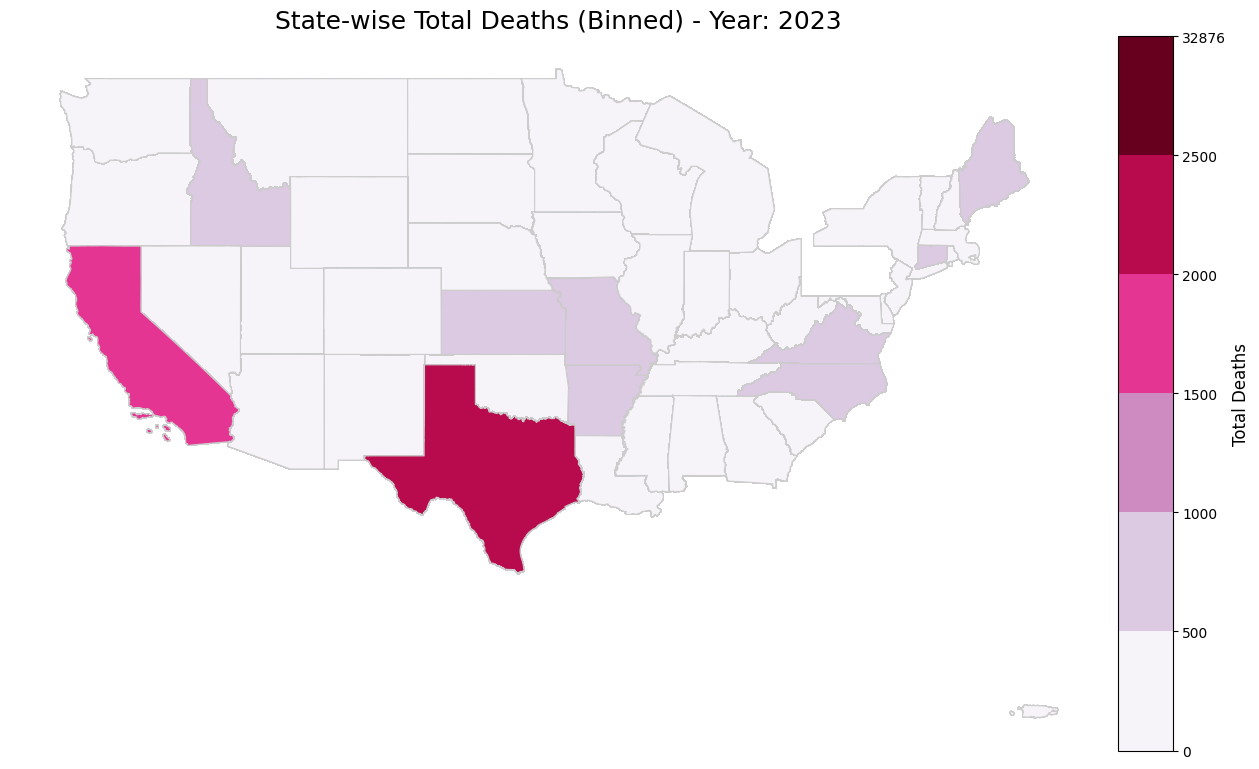

In [87]:
#Year-wise Total mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the Total deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['Total_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['Total_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Total_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'Total_Deaths', 'Deaths_Binned']].sort_values(by='Total_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.PuRd  # Using 'PuRd' (Purple-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Total Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['Total_Deaths']) and row['Total_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['Total_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    ax.set_title(f"State-wise Total Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()
